In [1]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import os
import glob
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
from tqdm import tqdm

dark_pink = '#BE575F'
dark_blue = '#232C56'

In [2]:
PATH = r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\pretraining_lesion\\'


In [3]:
def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name,bbox_inches=0,transparent = True)
    plt.close()
    

In [9]:

AA_T_levels = []
AA_animals = []
AA_Type = []
AA_catagory= []

for file in os.listdir(PATH):
    
    print(file)
    
    control_path = os.path.join(PATH, file,'control')
    control_paths = glob.glob(control_path + '\*\AcrossSessions\AnalysisOutput\\')
    
    lesion_path = os.path.join(PATH, file,'lesions')
    lesion_paths = glob.glob(lesion_path + '\*\AcrossSessions\AnalysisOutput\\')
    
    lesion_T_levels = []
    for path in lesion_paths:
        with open (path + 'Training_levels' , 'rb') as fp:
            T_levels = pickle.load(fp)  
            lesion_T_levels = lesion_T_levels + [T_levels]
#         with open (path + 'TrialsPerSessions' , 'rb') as fp:
#             trials_per_session = pickle.load(fp)        
#             lesion_trials_per_session = lesion_trials_per_session + [trials_per_session]
                 
    AA_T_levels = AA_T_levels + lesion_T_levels
    AA_animals = AA_animals + os.listdir(PATH+file+'\\lesions')
    AA_Type = AA_Type + ([file] * len(os.listdir(PATH+file+'\\lesions')))
    AA_catagory = AA_catagory + ['lesion']* len(os.listdir(PATH+file+'\\lesions'))
            
    control_T_levels = []
    for path in control_paths:
        with open (path + 'Training_levels' , 'rb') as fp:
            T_levels = pickle.load(fp)     
            control_T_levels = control_T_levels + [T_levels]
#         with open (path + 'TrialsPerSessions' , 'rb') as fp:
#             trials_per_session = pickle.load(fp)        
#             control_trials_per_session = control_trials_per_session + [trials_per_session]
            
    AA_T_levels = AA_T_levels + control_T_levels 
    AA_animals = AA_animals + os.listdir(PATH+file+'\\control')
    AA_Type = AA_Type + ([file] * len(os.listdir(PATH+file+'\\control')))
    AA_catagory = AA_catagory + ['control']* len(os.listdir(PATH+file+'\\control'))
    
    
pl_data = pd.DataFrame({'animal':AA_animals,'type':AA_Type,'catagory':AA_catagory,'training_levels':AA_T_levels})

DLS
DMS


In [10]:
pl_data

,animal,type,catagory,training_levels
0,EJT116,DLS,lesion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,EJT117,DLS,lesion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,EJT118,DLS,lesion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,EJT121,DLS,lesion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,EJT123,DLS,lesion,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
5,EJT164,DLS,lesion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ..."
6,EJT94,DLS,lesion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
7,EJT187,DLS,control,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
8,EJT188,DLS,control,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
9,EJT189,DLS,control,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


Lesion n = 7
Control n = 6


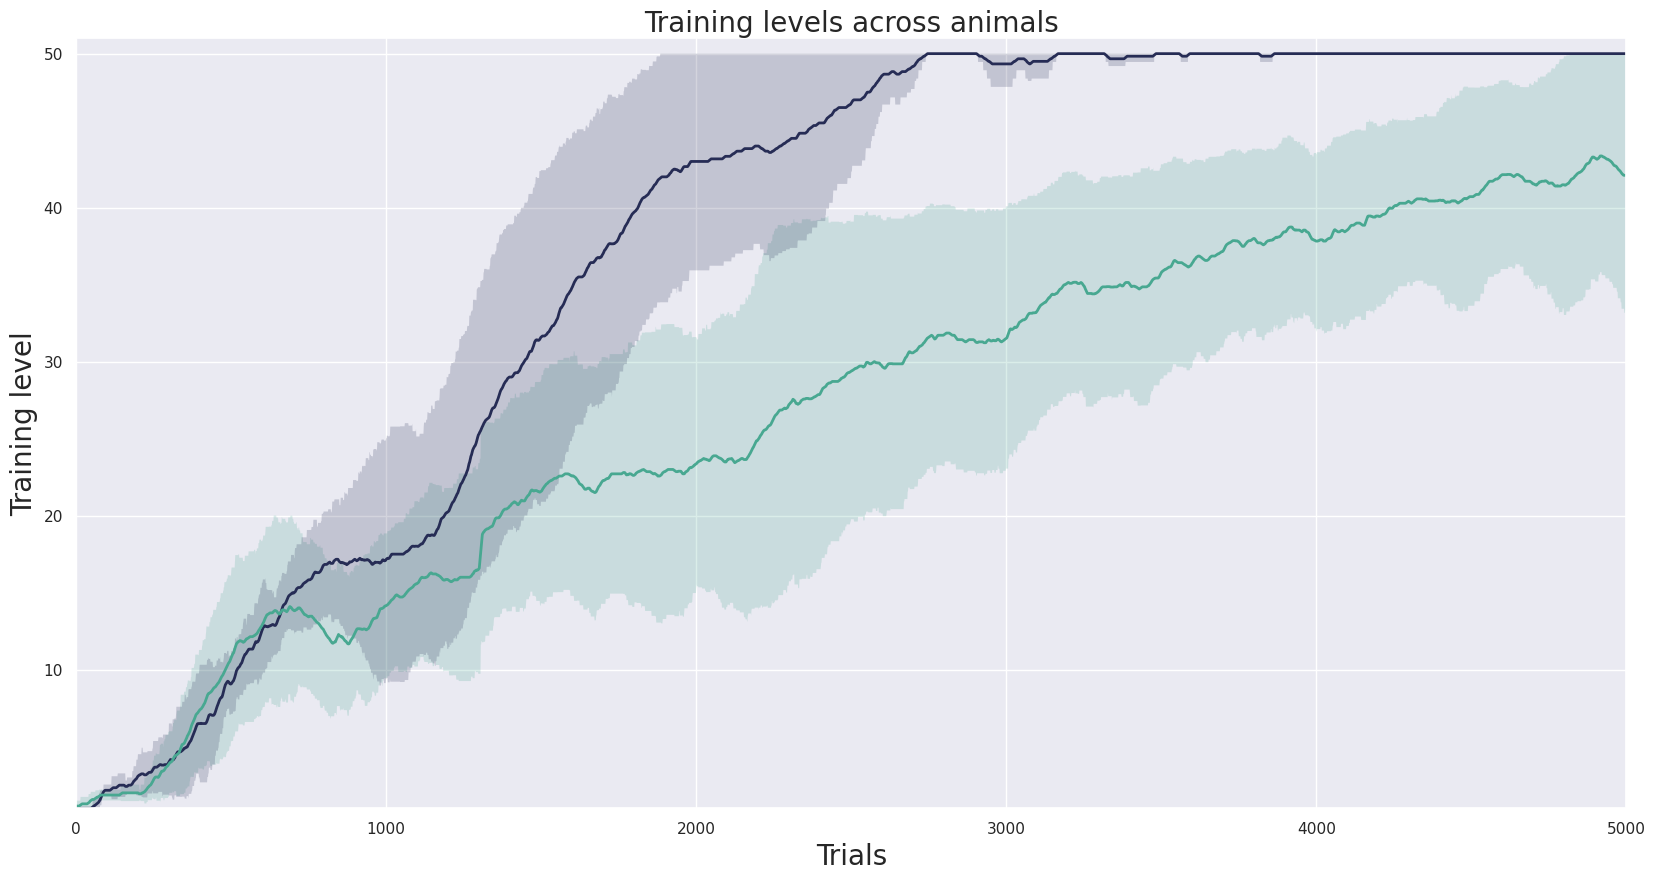

In [11]:

DLS_mask = pl_data.type.values =='DLS'
DMS_mask = pl_data.type.values =='DMS'

catagories = pl_data.catagory[DLS_mask].values
animals = pl_data.animal[DLS_mask].values
t_levels = pl_data.training_levels[DLS_mask].values

lesion_mask = catagories == 'lesion'

TrialbyTrial_Pscores = conactinate_nth_items(list(t_levels[lesion_mask]))
lesion_MeanLearningCurve = []
lesion_std = []
for i,item in enumerate(TrialbyTrial_Pscores):
    lesion_MeanLearningCurve = lesion_MeanLearningCurve + [np.mean(item)]
    lesion_std = lesion_std + [np.std(item)]
    
control_mask = catagories == 'control'
    
TrialbyTrial_Pscores = conactinate_nth_items(list(t_levels[control_mask]))
control_MeanLearningCurve = []
control_std = []
for i,item in enumerate(TrialbyTrial_Pscores):
    control_MeanLearningCurve = control_MeanLearningCurve + [np.mean(item)]
    control_std = control_std + [np.std(item)]
    
    

%matplotlib inline  

################################################################################################################
## Training levels  
window = 10
xlim = 5000
################################################################################################################


fig,ax = plt.subplots(1, 1, figsize=(20, 10))

plt.style.use('classic')


# for i in range(len(t_levels[lesion_mask])):
#     ax.plot(t_levels[lesion_mask][i],alpha = 0.3,color = dark_pink) 
# for i in range(len(t_levels[control_mask])):
#     ax.plot(t_levels[control_mask][i],alpha = 0.3,color = dark_blue) 

ax.set_xlim([0, xlim])
ax.set_ylim([1, 51])

print('Lesion n = ' + str(len(animals[lesion_mask])))
print('Control n = ' + str(len(animals[control_mask])))


ax.plot(convolve_movmean(control_MeanLearningCurve[0:xlim],window), '-',color = '#262C55',linewidth = 2)
ax.plot(convolve_movmean(lesion_MeanLearningCurve[0:xlim],window), '-',color = '#48A891',linewidth = 2)
   
ax.set_title('Training levels across animals',fontsize = 20)
ax.set_xlabel('Trials',fontsize = 20)

ax.set_ylabel('Training level',fontsize = 20)

upper = np.array(lesion_MeanLearningCurve[0:xlim]) + np.array(lesion_std[0:xlim])
lower = np.array(lesion_MeanLearningCurve[0:xlim]) - np.array(lesion_std[0:xlim])

# cut off at 50 because of cieling effect 
for index,item in enumerate(upper):
    if item > 50:
        upper[index] = 50.0

ax.fill_between(list(range(0,len(upper))),(lower),(upper),
    alpha=0.2, edgecolor='None', facecolor='#48A891',
    linewidth=1, linestyle='dashdot', antialiased=True)

upper = np.array(control_MeanLearningCurve[0:xlim]) + np.array(control_std[0:xlim])
lower = np.array(control_MeanLearningCurve[0:xlim]) - np.array(control_std[0:xlim])

# cut off at 50 because of cieling effect 
for index,item in enumerate(upper):
    if item > 50:
        upper[index] = 50.0
        
ax.fill_between(list(range(0,len(upper))),(lower),(upper),
    alpha=0.2, edgecolor='None', facecolor='#262C55',
    linewidth=1, linestyle='dashdot', antialiased=True)

# SaveFig('DLS_Lesion_curve.pdf',r'Z:\projects\Emmett\Documents\replay_paper\figures\figure1\\')


In [12]:
### reshape into dataframe

# # cut trials down:
# cut = min(map(len, t_levels))
cut = 4000

new = []
group = []
cum_trials= []
animalid = []
for index,item in enumerate(t_levels):

    new = new + item[0:cut]
    if index < len(t_levels)/2:
        group = group + cut*['lesion']
    else:
        group = group + cut*['control']
        
    
    animalid = animalid + [animals[index]]*cut
        
    cum_trials = cum_trials + list(np.linspace(1,cut,cut))

    
df = pd.DataFrame({'CumTrials': cum_trials, 'Level':new, 'Group': group, 'ID':animalid})
    

In [13]:
# parameters for the plotting
hue_order = ['control', 'lesion']
color_palette = [(0.24715576, 0.49918708, 0.57655991), (160/255, 11/255 , 11/255)]
sns.set_palette(color_palette)

# define a function to generate a list of experimental groups randomly
def generate_eg(list_size, prob, labs = hue_order):
    ltr = []
    for i in range(list_size):
        if random.random() < prob:
            ltr.append(labs[0])
        else:
            ltr.append(labs[1])
    return ltr

# define a 100-trial window to bin the data
xbin = 100
df["TrialIndexBinned"] = (df.CumTrials.values // xbin) * xbin + xbin / 2
print('Trials are binned in groups of', xbin)

# groupby so each animal has a mean of the performance in each bin
df_bintr = df.groupby(['ID','Group','TrialIndexBinned']).mean().reset_index()

# create a scaled version of the performance
# df_bintr['Performance'] = df_bintr.Level * 100
df_bintr['Performance'] = df_bintr.Level 

# calculate the differences of the means using the binned data
perdif_df = df_bintr[df_bintr.Group == hue_order[0]].groupby('TrialIndexBinned').mean()['Performance'] -\
            df_bintr[df_bintr.Group == hue_order[1]].groupby('TrialIndexBinned').mean()['Performance']

Trials are binned in groups of 100


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3352013967.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perdif_df = df_bintr[df_bintr.Group == hue_order[0]].groupby('TrialIndexBinned').mean()['Performance'] -\
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3352013967.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bintr[df_bintr.Group == hue_order[1]].groupby('TrialIndexBinned').mean()['Performance']


In [ ]:
# Select the amount of times to shuffle. Originally this is done 10,000 times
# use a smaller number to speed things up
nsh = 10000
import random
# select the important columns
df_colsel = df_bintr[['ID', 'Group', 'TrialIndexBinned', 'Performance']].copy()
# get the experimental group for each animal
exp_gr = [df_colsel[df_colsel.ID==x].Group.unique()[0] for x in df_colsel.ID.unique()]
# get the number of mice
n_an = len(exp_gr)
# get the probability of a mouse to be a control for this dataset
cb_prob = sum([x==hue_order[0] for x in exp_gr]) / n_an
# set random seed
np.random.seed(124321)
# calculate the differences of means by resampling
shuff_res = []

for i in tqdm(range(nsh)):
    # shuffle the list of groups by assigning a probability for each mouse to be in a group based on the real ratio
    exp_grs = generate_eg(n_an, cb_prob)
    # create a diccionary
    egs_dict = dict(zip(df_colsel.ID.unique(), exp_grs))
    # create a new column with the shuffled group
    df_colsel['egs'] = [egs_dict[x] for x in df_colsel.ID]
    # calculate the differences and append
    shuff_res.append(df_colsel[df_colsel.egs == hue_order[0]].groupby('TrialIndexBinned').mean()['Performance'] -\
                     df_colsel[df_colsel.egs == hue_order[1]].groupby('TrialIndexBinned').mean()['Performance'])
# save in a data frame format
shrdf = pd.concat(shuff_res)


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\495027807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  real_data = df_colsel[df_colsel.Group == hue_order[0]].groupby('TrialIndexBinned').mean()['Performance'] -\
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\495027807.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_colsel[df_colsel.Group == hue_order[1]].groupby('TrialIndexBinned').mean()['Performance']


Data is shuffled 10000 times


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\495027807.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


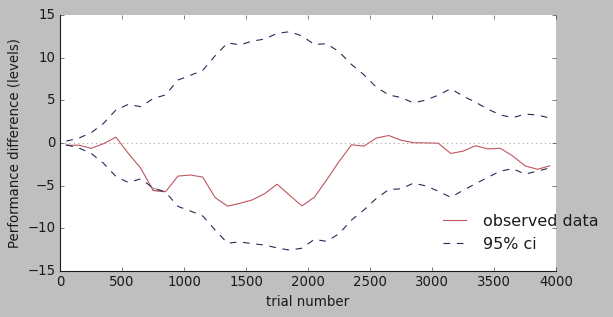

In [20]:
real_data = df_colsel[df_colsel.Group == hue_order[0]].groupby('TrialIndexBinned').mean()['Performance'] -\
            df_colsel[df_colsel.Group == hue_order[1]].groupby('TrialIndexBinned').mean()['Performance']

real_data = real_data*-1

print('Data is shuffled', nsh, 'times')

#plot
pos_ci = shrdf.groupby('TrialIndexBinned').quantile(.95)
neg_ci = shrdf.groupby('TrialIndexBinned').quantile(.05)

fig2 = plt.figure(figsize=(8, 4))
plt.axhline(0, ls='dotted', alpha=0.4, color='k')
plt.plot(real_data, color='#BE575F', label='observed data')
plt.plot(pos_ci, linestyle='--', color='#232C56', label='95% ci')
plt.plot(neg_ci, linestyle='--', color='#232C56')
x = pos_ci.reset_index().TrialIndexBinned
y1 = neg_ci.reset_index().Performance
y2 = real_data.reset_index().Performance
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='#BE575F', alpha=.3, interpolate=True)
plt.ylabel('Performance difference (levels)')
# plt.ylabel('performance difference (%)')
plt.xlabel('trial number')
plt.legend(loc=(0.75,0.05), frameon=False)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim((0,4000))

# SaveFig('DMS_Lesion_95ci.pdf',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')
fig2.show()

In [21]:

DLS_mask = pl_data.type.values =='DLS'
DMS_mask = pl_data.type.values =='DMS'

## DMS
catagories = pl_data.catagory[DMS_mask].values
animals = pl_data.animal[DMS_mask].values
t_levels = pl_data.training_levels[DMS_mask].values
lesion_mask = catagories == 'lesion'
control_mask = catagories == 'control'

dms_c_max_l = []
dms_c_t_reached = []
for item in t_levels[control_mask]:
    dms_c_max_l = dms_c_max_l+ [max(item[0:cut])]
    dms_c_t_reached = dms_c_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]
    
dms_l_max_l = []
dms_l_t_reached = []
for item in t_levels[lesion_mask]:
    dms_l_max_l = dms_l_max_l+ [max(item[0:cut])]
    dms_l_t_reached = dms_l_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]
    

## DLS
catagories = pl_data.catagory[DLS_mask].values
animals = pl_data.animal[DLS_mask].values
t_levels = pl_data.training_levels[DLS_mask].values
lesion_mask = catagories == 'lesion'
control_mask = catagories == 'control'

dls_c_max_l = []
dls_c_t_reached = []
for item in t_levels[control_mask]:
    dls_c_max_l = dls_c_max_l+ [max(item[0:cut])]
    dls_c_t_reached = dls_c_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]
    
dls_l_max_l = []
dls_l_t_reached = []
for item in t_levels[lesion_mask]:
    dls_l_max_l = dls_l_max_l+ [max(item[0:cut])]
    dls_l_t_reached = dls_l_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]

not enough samples for normality test, assumed normally distributed
------
DMS trials to max diff
Ttest_indResult(statistic=-0.13979913160592952, pvalue=0.8915943034313121)
DMS max level diff
Ttest_indResult(statistic=1.0000000000000016, pvalue=0.3408931323020591)
DLS trials to max diff
Ttest_indResult(statistic=-4.3144737002939255, pvalue=0.0012259358153422766)
DLS max level diff
Ttest_indResult(statistic=4.5997510660946235, pvalue=0.0007652388174520488)


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3494504320.py:52: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(scipy.stats.ttest_ind(plot_df2.max_level[plot_df2.DMS_groups == 'control'],plot_df2.max_level[plot_df2.DMS_groups == 'lesion']))
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3494504320.py:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(scipy.stats.ttest_ind(plot_df4.max_level[plot_df4.DLS_groups == 'control'],plot_df4.max_level[plot_df4.DLS_groups == 'lesion']))


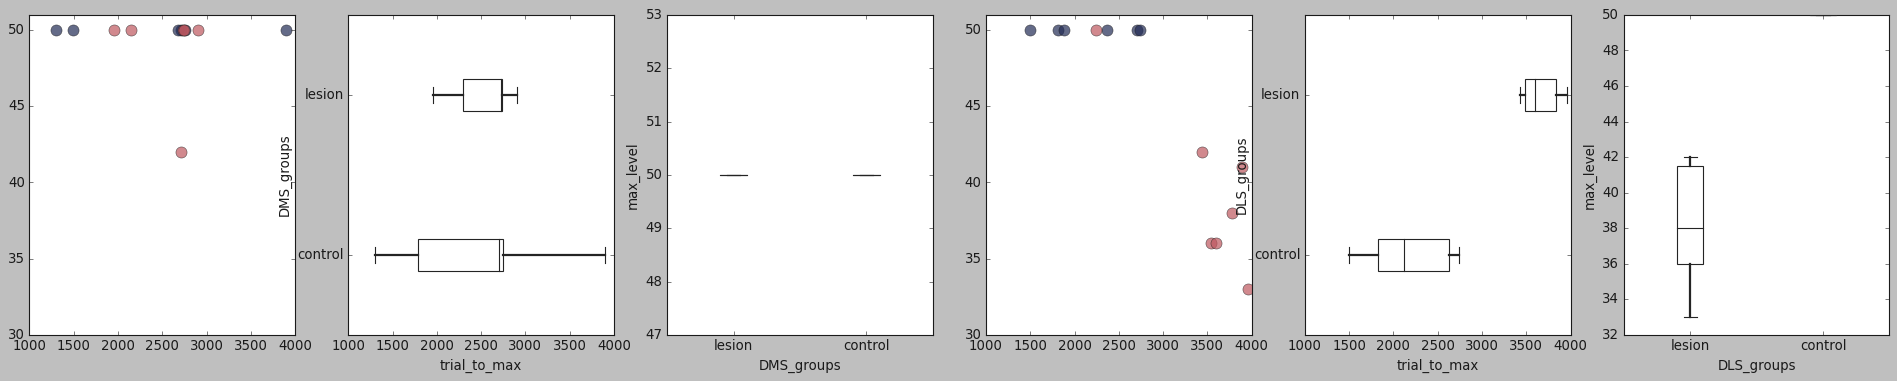

In [22]:
## Plot 

import scipy 
    
fig,[ax,ax1,ax2,ax3,ax4,ax5] = plt.subplots(1, 6, figsize=(30, 5))


ax.set_xlim([1000, 4000])
ax.set_ylim([30, 51])

ax.plot(dms_c_t_reached,dms_c_max_l,'o',color = dark_blue,markersize = 10,alpha = 0.7)
ax.plot(dms_l_t_reached,dms_l_max_l,'o',color = dark_pink,markersize = 10,alpha = 0.7)

plot_df1 = pd.DataFrame({'DMS_groups': ['lesion']*len(dms_l_t_reached) + ['control']*len(dms_c_t_reached),'trial_to_max': dms_l_t_reached+dms_c_t_reached})
ax1=sns.boxplot( x = 'trial_to_max', y = 'DMS_groups', data = plot_df1, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'h',ax = ax1)

plot_df2 = pd.DataFrame({'DMS_groups': ['lesion']*len(dms_l_t_reached) + ['control']*len(dms_c_t_reached),'max_level': dms_l_max_l+dms_c_max_l})
ax2=sns.boxplot( y = 'max_level', x = 'DMS_groups', data = plot_df2, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax2)

ax3.set_xlim([1000, 4000])
ax3.set_ylim([30, 51])

ax3.plot(dls_c_t_reached,dls_c_max_l,'o',color = dark_blue,markersize = 10,alpha = 0.7)
ax3.plot(dls_l_t_reached,dls_l_max_l,'o',color = dark_pink,markersize = 10,alpha = 0.7)

plot_df3 = pd.DataFrame({'DLS_groups': ['lesion']*len(dls_l_t_reached) + ['control']*len(dls_c_t_reached),'trial_to_max': dls_l_t_reached+dls_c_t_reached})
ax4=sns.boxplot( x = 'trial_to_max', y = 'DLS_groups', data = plot_df3, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'h',ax = ax4)

plot_df4 = pd.DataFrame({'DLS_groups': ['lesion']*len(dls_l_t_reached) + ['control']*len(dls_c_t_reached),'max_level': dls_l_max_l+dls_c_max_l})
ax5=sns.boxplot( y = 'max_level', x = 'DLS_groups', data = plot_df4, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax5)

# SaveFig('Lesions_trials_to_max.pdf',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')


print('not enough samples for normality test, assumed normally distributed') 
print('------')
print('DMS trials to max diff')
print(scipy.stats.ttest_ind(plot_df1.trial_to_max[plot_df1.DMS_groups == 'control'],plot_df1.trial_to_max[plot_df1.DMS_groups == 'lesion']))
print('DMS max level diff')
print(scipy.stats.ttest_ind(plot_df2.max_level[plot_df2.DMS_groups == 'control'],plot_df2.max_level[plot_df2.DMS_groups == 'lesion']))
print('DLS trials to max diff')
print(scipy.stats.ttest_ind(plot_df3.trial_to_max[plot_df3.DLS_groups == 'control'],plot_df3.trial_to_max[plot_df3.DLS_groups == 'lesion']))
print('DLS max level diff')
print(scipy.stats.ttest_ind(plot_df4.max_level[plot_df4.DLS_groups == 'control'],plot_df4.max_level[plot_df4.DLS_groups == 'lesion']))

In [23]:
PATH = r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS'


In [24]:

## load in data

data = pd.DataFrame({'Group':[],'mean':[], 'latencies':[],'standard dev':[], 'latencies':[],'error scores':[],'error breakdown [seq,spatial,repeat,other]':[],'pscores':[],'tscores':[],'transition_matrix':[],'animal':[],'type':[]})

for file_ in os.listdir(PATH):
    
    print(file_)
    new_path = os.path.join(PATH,file_)
    paths = glob.glob(new_path + '\*\Postlesion\\')
    for path in paths:
        os.listdir(path) 
        for file in os.listdir(path):
            if 'data' in file:
                print(path)
                with open (path + file , 'rb') as fp:
                    dat = pickle.load(fp)  
                    dat['animal'] = [path.split('\\')[-3]]*3
                    dat['type'] = [file_]*3
                    data = data.append(dat)


    

control
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT101\Postlesion\


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)


Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT147\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT148\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT174\Postlesion\


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)


Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT175\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT176\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT177\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\control\EJT99\Postlesion\
lesion


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)


Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT154\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT155\Postlesion\


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)


Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT156\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT157\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT159\Postlesion\


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)


Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT161\Postlesion\
Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\data\posttraining_lesion\DLS\lesion\EJT85\Postlesion\


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3122420154.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dat)


In [4]:
data

,Group,mean,latencies,standard dev,error scores,"error breakdown [seq,spatial,repeat,other]",pscores,tscores,transition_matrix,animal,type,mean latencies,standard dev latencies
0,Early Learning,NaN,NaN,NaN,"[0.24671734623358674, 0.6710435383552177, 0.08...","[0.38722966014418125, 0.027806385169927908, 0....","[0.07294685990338164, 0.18518518518518517, 0.5...","[0.6280193236714975, 0.3333333333333333, 0.757...","[[5.0, 5.0, 5.0, 11.0], [0.0, 0.0, 0.0, 0.0], ...",EJT101,control,1.143258,0.430806
1,Pre Lesion,NaN,NaN,NaN,"[0.7438626774069812, 0.25182201764480244, 0.00...","[0.3480578827113481, 0.016374714394516376, 0.6...","[0.78125, 0.7881914893617022, 0.796108202443281]","[0.8595679012345679, 0.924468085106383, 0.9491...","[[5.0, 5.0, 4.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",EJT101,control,0.336717,0.125642
2,Post Lesion,NaN,NaN,NaN,"[0.7319931808495524, 0.25422645262111093, 0.01...","[0.4294495669181336, 0.03827884884045823, 0.51...","[0.7014035087719297, 0.636844331641286, 0.7362...","[0.9508771929824561, 0.9373096446700508, 0.926...","[[3.0, 5.0, 4.0, 8.0], [12.0, 32.0, 9.0, 5.0],...",EJT101,control,0.335876,0.130588
0,Early Learning,NaN,NaN,NaN,"[0.35364112327463115, 0.5654450261780105, 0.08...","[0.4511784511784512, 0.07996632996632996, 0.39...","[0.034482758620689655, 0.35760517799352753, 0....","[0.47413793103448276, 0.7103559870550161, 0.76...","[[0.0, 1.0, 5.0, 4.0], [7.0, 51.0, 18.0, 2.0],...",EJT147,control,1.089839,0.454202
1,Pre Lesion,NaN,NaN,NaN,"[0.8360157141046762, 0.1619566594854898, 0.002...","[0.30907668231611896, 0.03599374021909233, 0.6...","[0.9446666666666668, 0.9476695796920517, 0.822...","[0.978, 0.9950062421972534, 0.9946164199192463]","[[1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",EJT147,control,0.322709,0.106392
2,Post Lesion,NaN,NaN,NaN,"[0.8394107021901106, 0.1565816211334387, 0.004...","[0.3370583994232156, 0.16186012977649603, 0.48...","[0.9204946996466431, 0.9186567164179105, 0.714...","[0.9910875539850805, 0.9915422885572139, 0.977...","[[0.0, 2.0, 1.0, 2.0], [0.0, 0.0, 0.0, 0.0], [...",EJT147,control,0.311474,0.103548
0,Early Learning,NaN,NaN,NaN,"[0.3664, 0.5525333333333333, 0.08106666666666666]","[0.5154440154440154, 0.03185328185328185, 0.38...","[0.0, 0.2911392405063291, 0.6781914893617021]","[0.6182170542635659, 0.7246835443037974, 0.824...","[[3.0, 3.0, 3.0, 9.0], [8.0, 48.0, 14.0, 3.0],...",EJT148,control,1.008243,0.391170
1,Pre Lesion,NaN,NaN,NaN,"[0.732730692862368, 0.26267112550945765, 0.004...","[0.3666202506465088, 0.10105430674358465, 0.52...","[0.8040690104166667, 0.7470869746150645, 0.738...","[0.98125, 0.981751976695797, 0.9665717900063251]","[[2.0, 0.0, 2.0, 3.0], [9.0, 24.0, 7.0, 0.0], ...",EJT148,control,0.342301,0.132635
2,Post Lesion,NaN,NaN,NaN,"[0.6912518185843507, 0.3043203238661522, 0.004...","[0.35647474537518187, 0.08023279983371441, 0.5...","[0.7635741265344663, 0.7195238095238095, 0.697...","[0.9848048473402581, 0.9884920634920634, 0.982...","[[1.0, 2.0, 0.0, 3.0], [3.0, 17.0, 5.0, 1.0], ...",EJT148,control,0.352276,0.138421
0,Early Learning,NaN,NaN,NaN,"[0.3773319253783879, 0.5508623724040831, 0.071...","[0.4012779552715655, 0.05047923322683706, 0.51...","[0.057471264367816084, 0.2620772946859904, 0.7...","[0.4827586206896552, 0.7946859903381643, 0.907...","[[4.0, 8.0, 6.0, 4.0], [0.0, 0.0, 0.0, 0.0], [...",EJT174,control,0.969112,0.424482


In [25]:
lesion_mask = data.type.values == 'lesion'

l_early_learning_mask = data[lesion_mask].Group.values == 'Early Learning'
l_pre_mask = data[lesion_mask].Group.values == 'Pre Lesion'
l_post_mask = data[lesion_mask].Group.values == 'Post Lesion'


control_mask = data.type.values == 'control'

c_early_learning_mask = data[control_mask].Group.values == 'Early Learning'
c_pre_mask = data[control_mask].Group.values == 'Pre Lesion'
c_post_mask = data[control_mask].Group.values == 'Post Lesion'


In [26]:
import scipy
dark_pink = '#BE575F'
dark_blue = '#232C56'

lesions_temp = []
for index in range(len(data[lesion_mask][l_pre_mask].pscores.values)):
    lesions_temp.append((data[lesion_mask][l_pre_mask].pscores.values[index] + data[lesion_mask][l_post_mask].pscores.values[index])[0:6])
    
controls_temp = []
for index in range(len(data[control_mask][c_pre_mask].pscores.values)):
    controls_temp.append((data[control_mask][c_pre_mask].pscores.values[index] + data[control_mask][c_post_mask].pscores.values[index])[0:6])


Cmeans = []
Cst_devs = []
for item in conactinate_nth_items(controls_temp):
    Cmeans = Cmeans + [np.mean(item)]
    Cst_devs = Cst_devs + [np.std(item)]
    
Lmeans = []
Lst_devs = []
for item in conactinate_nth_items(lesions_temp):
    Lmeans = Lmeans + [np.mean(item)]
    Lst_devs = Lst_devs + [np.std(item)]

nrow = 1 
ncol = 1
counter = 0
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 4))
for ind, ax in enumerate(fig.axes):
    for item in controls_temp:
        plt.plot(item,'o-', c = dark_blue)
    for item in lesions_temp:
        plt.plot(item,'o-', c = dark_pink)
#     ax.errorbar(np.linspace(0,5,6)-0.05,Cmeans,Cst_devs,marker = 'o',linestyle = '-',color = dark_blue, alpha = 1, markersize = 15)
#     ax.errorbar(np.linspace(0,5,6)+0.05,Lmeans,Lst_devs,marker = 'o',linestyle = '-',color = dark_pink, alpha = 1, markersize = 15)
    
ax.set_xticklabels(('','-3', '-2', '-1', '+1', '+2','+3'), fontsize = 15)

ax.set_ylabel('P-Score',fontsize = 20)
ax.set_xlabel('Session before/after lesion',fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_title('Perfect scores',loc = 'left',fontsize = 20,pad = 50)

ax.set_ylim([-0.1, 1])
    
# # ax.axvspan(-0.25, 2.25, alpha=0.1, facecolor= 'grey')
ax.axvspan(2.2, 2.8, alpha=0.3, facecolor= 'grey')

ax.text(2.25,1.03,'10 day gap', fontsize = 20)

ax.text(6,0.55,'Lesion', fontsize = 30, color = dark_pink)
ax.text(6,0.45,'Control', fontsize = 30,color = dark_blue)

SaveFig('Performance_pre_post.pdf',r'Z:\projects\Emmett\Documents\replay_paper\figures\figure1\\')



from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

control_ = []
for index,item in enumerate(conactinate_nth_items(controls_temp)):
    print('control' + str(index+1))
    control_= control_ + [item]
    print(scipy.stats.normaltest(item))
lesion_ = []
for index,item in enumerate(conactinate_nth_items(lesions_temp)):
    print('lesion' + str(index+1))
    lesion_= lesion_ + [item]
#     print(scipy.stats.normaltest(item))
print('--------')
print('cant test lesion data as only 7 samples per session and 8 needed for normality test - assumed normally distributed')
print('----- ANOVA:')
print(scipy.stats.f_oneway(control_[0],control_[1],control_[2],lesion_[0],lesion_[1],lesion_[2],control_[3],control_[4],control_[5],lesion_[3],lesion_[4],lesion_[5]))


#create DataFrame to hold data
df = pd.DataFrame({'score': control_[0] + control_[1] +control_[2]+lesion_[0]+lesion_[1]+lesion_[2]+control_[3]+control_[4]+control_[5]+lesion_[3]+lesion_[4]+lesion_[5],
                   'group': list(np.repeat(['c_pre1', 'c_pre2', 'c_pre3'], repeats=8)) + list(np.repeat(['l_pre1', 'l_pre2', 'l_pre3'], repeats=7)) + list(np.repeat(['c_post1', 'c_post2', 'c_post3'], repeats=8)) + list(np.repeat(['l_post1', 'l_post2', 'l_post3'], repeats=7))}) 
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
#display results
print(tukey)


C:\Users\Emmett\AppData\Local\Temp\ipykernel_9284\3470589880.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('','-3', '-2', '-1', '+1', '+2','+3'), fontsize = 15)


control1
NormaltestResult(statistic=0.04829051729600013, pvalue=0.9761439061150001)
control2
NormaltestResult(statistic=0.38529958100886147, pvalue=0.8247707661212729)
control3
NormaltestResult(statistic=1.2727665684885163, pvalue=0.529202943681641)
control4
NormaltestResult(statistic=0.1423668071173753, pvalue=0.9312910743665654)
control5
NormaltestResult(statistic=2.8228998169649886, pvalue=0.2437895542354966)
control6
NormaltestResult(statistic=0.2508558168012332, pvalue=0.8821193555300004)
lesion1
lesion2
lesion3
lesion4
lesion5
lesion6
--------
cant test lesion data as only 7 samples per session and 8 needed for normality test - assumed normally distributed
----- ANOVA:
F_onewayResult(statistic=37.468931215486414, pvalue=1.2952168021916435e-26)


C:\Users\Emmett\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
c_post1 c_post2    0.001    1.0 -0.2226  0.2245  False
c_post1 c_post3  -0.0163    1.0 -0.2398  0.2073  False
c_post1  c_pre1   0.0884 0.9722 -0.1352  0.3119  False
c_post1  c_pre2   0.0613 0.9987 -0.1622  0.2849  False
c_post1  c_pre3   0.0471 0.9999 -0.1764  0.2707  False
c_post1 l_post1  -0.6861    0.0 -0.9174 -0.4547   True
c_post1 l_post2   -0.617    0.0 -0.8484 -0.3856   True
c_post1 l_post3   -0.604    0.0 -0.8354 -0.3726   True
c_post1  l_pre1   0.0191    1.0 -0.2123  0.2505  False
c_post1  l_pre2    0.017    1.0 -0.2144  0.2483  False
c_post1  l_pre3   0.0609 0.9991 -0.1705  0.2923  False
c_post2 c_post3  -0.0172    1.0 -0.2408  0.2063  False
c_post2  c_pre1   0.0874 0.9744 -0.1362  0.3109  False
c_post2  c_pre2   0.0603 0.9988 -0.1632  0.2839  False
c_post2  c_pre3   0.0461 0.9999 -0.1774  0.2697  False
c_post2 l_

In [21]:
lesions_temp

[[0.680952380952381,
  0.6974272930648769,
  0.7070293094883259,
  0.0756578947368421,
  0.0625,
  0.0],
 [0.8136666666666666,
  0.8723511214230472,
  0.8362068965517241,
  0.12634408602150538,
  0.6681793179317931,
  0.7615810674723061],
 [0.7354166666666667, 0.7722305017386986, 0.7945134575569358, 0.0, 0.0, 0.0],
 [0.7472504230118442,
  0.6240126832232095,
  0.7797456857402361,
  0.011594202898550725,
  0.11235955056179775,
  0.018518518518518517],
 [0.7892924976258309,
  0.7554012345679012,
  0.8064165307232191,
  0.10903703703703703,
  0.045019157088122604,
  0.0],
 [0.7294784580498866, 0.7196943186496501, 0.8310869565217391, 0.0, 0.0, 0.0],
 [0.8442477876106195,
  0.8843696027633852,
  0.8783482142857143,
  0.08181818181818182,
  0.0,
  0.19879518072289157]]

In [19]:
lesions_temp

[[0.680952380952381,
  0.6974272930648769,
  0.7070293094883259,
  0.0756578947368421,
  0.0625,
  0.0],
 [0.8136666666666666,
  0.8723511214230472,
  0.8362068965517241,
  0.12634408602150538,
  0.6681793179317931,
  0.7615810674723061],
 [0.7354166666666667, 0.7722305017386986, 0.7945134575569358, 0.0, 0.0, 0.0],
 [0.7472504230118442,
  0.6240126832232095,
  0.7797456857402361,
  0.011594202898550725,
  0.11235955056179775,
  0.018518518518518517],
 [0.7892924976258309,
  0.7554012345679012,
  0.8064165307232191,
  0.10903703703703703,
  0.045019157088122604,
  0.0],
 [0.7294784580498866, 0.7196943186496501, 0.8310869565217391, 0.0, 0.0, 0.0],
 [0.8442477876106195,
  0.8843696027633852,
  0.8783482142857143,
  0.08181818181818182,
  0.0,
  0.19879518072289157]]

In [15]:
controls_temp

[[0.78125,
  0.7881914893617022,
  0.796108202443281,
  0.7014035087719297,
  0.636844331641286,
  0.736229415105054],
 [0.9446666666666668,
  0.9476695796920517,
  0.8224540152534769,
  0.9204946996466431,
  0.9186567164179105,
  0.7146029793631269],
 [0.8040690104166667,
  0.7470869746150645,
  0.7382985452245414,
  0.7635741265344663,
  0.7195238095238095,
  0.6970916057122953],
 [0.70054369886133,
  0.6894771241830066,
  0.7043501611170784,
  0.5393285371702637,
  0.5980197364063845,
  0.675380608974359],
 [0.873763440860215,
  0.8541296060991106,
  0.8899087221095335,
  0.8688777936281502,
  0.8861832611832611,
  0.8507799671592774],
 [0.9164570230607967,
  0.8807740324594258,
  0.888744212962963,
  0.7852475928473177,
  0.8842005076142132,
  0.8925606247431154],
 [0.8120567375886525,
  0.7388826606875933,
  0.7614379084967321,
  0.6718677762367083,
  0.5889016897081413,
  0.5562817719680464],
 [0.8246913580246913,
  0.7950231481481481,
  0.7262379896526238,
  0.6998474446987034,


In [42]:
pre_c_means = []
post_c_means = []
for item in controls_temp:
    pre_c_means = pre_c_means + [np.mean(item[0:3])]
    post_c_means = post_c_means + [np.mean(item[3::])]

pre_l_means = []
post_l_means = []
for item in lesions_temp:
    pre_l_means = pre_l_means + [np.mean(item[0:3])]
    post_l_means = post_l_means + [np.mean(item[3::])]
    
fig, ax = plt.subplots(1, 1,figsize=(10,7))

scores = pre_c_means + post_c_means + pre_l_means + post_l_means
type_ = ['c_baseline']*len(pre_c_means) + ['c_saline']*len(post_c_means) + ['l_Baseline']*len(pre_l_means) + ['l_lesion']*len(post_l_means)
plot_df = pd.DataFrame({'group': type_, 'performance_score': scores})

ax=sns.boxplot( y = 'performance_score', x = 'group', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

for i in range(len(pre_c_means)):
    plt.plot([0.3,0.7],[pre_c_means[i],post_c_means[i]],'o-',color = dark_blue, alpha = 1, markersize = 15,markeredgewidth=0)
for i in range(len(pre_l_means)):
    plt.plot([2.3,2.7],[pre_l_means[i],post_l_means[i]],'o-',color = '#56BEC1', alpha = 1, markersize = 15,markeredgewidth=0)
    

# SaveFig('Performance_pre_post_boxplots.pdf',r'D:\\')

In [51]:
# scipy.stats.normaltest(pre_l_means)
from scipy.stats import shapiro
shapiro(post_l_means)
# post_c_means

ShapiroResult(statistic=0.6116372346878052, pvalue=0.00037254678318277)

In [49]:
len(post_c_means)

8

In [ ]:
pre_l_means
post_l_means

In [58]:
import scipy.stats as stats
import scikit_posthocs as sp

# Assuming you have your data in lists or arrays
group1 = pre_c_means
group2 = post_c_means
group3 = pre_l_means
group4 = post_l_means

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(group1, group2, group3, group4)

# Print the results
print("Kruskal-Wallis Test:")
print("H statistic:", statistic)
print("p-value:", p_value)


# Perform post-hoc analysis using Dunn's test with Bonferroni correction
dunn_results = sp.posthoc_dunn([group1, group2, group3, group4])
print(dunn_results)

Kruskal-Wallis Test:
H statistic: 17.38981340199631
p-value: 0.000587550926195623
          1         2         3         4
1  1.000000  0.181923  0.435374  0.000069
2  0.181923  1.000000  0.610355  0.007168
3  0.435374  0.610355  1.000000  0.001955
4  0.000069  0.007168  0.001955  1.000000


In [54]:
dunn_results

,1,2,3,4
1,1.000000,1.000000,1.000000,0.000416
2,1.000000,1.000000,1.000000,0.043007
3,1.000000,1.000000,1.000000,0.011732
4,0.000416,0.043007,0.011732,1.000000


In [41]:
#stats
print('control stats:')
if scipy.stats.normaltest(list(plot_df.error_rate[cb_mask]) + list(plot_df.error_rate[cl_mask]))[-1] > 0.05:
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ttest_rel(plot_df.error_rate[cb_mask],plot_df.error_rate[cl_mask]))
print('---------')
#stats
print('lesion stats:')
if scipy.stats.normaltest(list(plot_df.error_rate[lb_mask]) + list(plot_df.error_rate[ll_mask]))[-1] > 0.05:
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ttest_rel(plot_df.error_rate[lb_mask],plot_df.error_rate[ll_mask]))

# SaveFig('error_rate.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

control stats:


AttributeError: 'DataFrame' object has no attribute 'error_rate'

In [43]:

c_all_tmatrix = [data[control_mask][c_early_learning_mask].transition_matrix.values,data[control_mask][c_pre_mask].transition_matrix.values,data[control_mask][c_post_mask].transition_matrix.values]
l_all_tmatrix = [data[lesion_mask][l_early_learning_mask].transition_matrix.values,data[lesion_mask][l_pre_mask].transition_matrix.values,data[lesion_mask][l_post_mask].transition_matrix.values]

C_group_means = average_across_animals_transition_matrix(c_all_tmatrix)
L_group_means = average_across_animals_transition_matrix(l_all_tmatrix)


######normalise data by column:
c_means_norm = normalise_transition_matrix_means(C_group_means) 
l_means_norm = normalise_transition_matrix_means(L_group_means) 

c_max = np.max(c_means_norm)
l_max = np.max(l_means_norm)

d1 = np.array(c_means_norm[1]) - np.array(c_means_norm[2])
d2 = np.array(l_means_norm[1]) - np.array(l_means_norm[2])
d1_list = [list(d1.tolist())]
d2_list = [list(d2.tolist())]

normalised_means = c_means_norm + l_means_norm

## create mask and labels
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
labels =  np.array([['','','',''],
                    ['','','',''],
                    ['','','',''],
                    ['','','','T4'],
                    ['','','T3',''],
                    ['','T2','',''],
                    ['T1','','',''],
                    ['','','','']])

mask = np.zeros_like(normalised_means[0])

#plot:
title = ['Early Learning','Baseline','Control','Early Learning','Baseline','Lesion']
with sns.axes_style("white"):
    nrow = 2 
    ncol = 3
    counter = 0
    fig, axs = plt.subplots(nrow, ncol,figsize=(30, 20))
    for ind, ax in enumerate(fig.axes):
        if counter < 3:
            maximum = c_max
        else:
            maximum = l_max
        h1 = sns.heatmap(normalised_means[counter],xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                        linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',ax=ax,cbar_kws = dict(use_gridspec=False,location="right"), vmin = 0,vmax = 0.8)

        ax.set_ylabel('End Port',size = 20)
        ax.set_xlabel('Start Port',size = 20)
        ax.set_title(title[counter], loc = 'left',pad = 20,fontsize = 20,color = 'firebrick')
        counter = counter + 1
    


    
# SaveFig('Lesions_heatmaps.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

NameError: name 'average_across_animals_transition_matrix' is not defined

In [44]:
import matplotlib.colors as clr

d1 = np.array(c_means_norm[2]) - np.array(c_means_norm[1])
d2 = np.array(l_means_norm[2]) - np.array(l_means_norm[1])
d1_list = [list(d1.tolist())]
d2_list = [list(d2.tolist())]

difference = d1_list + d2_list

maximum = max(np.max(d1_list),np.max(d2_list))
minimum = min(np.min(d1_list),np.min(d2_list))

# colors = ['#285CA6','#F4F4F4','#BE575F']
# colors = ['#232C56','#F4F4F4','#BE575F']
          #,'#219CC1','#A4D3B6','#ECEFB6','#E6BFC4']
#56BEC1
colors = ['#56BEC1','#F4F4F4','#232C56']

cmap = clr.LinearSegmentedColormap.from_list('custom blue', colors, N=256)

title = ['Control Difference','Lesion Difference']

with sns.axes_style("white"):
    
    nrow = 1 
    ncol = 2
    counter = 0
    fig, axs = plt.subplots(nrow, ncol,figsize=(30, 20))
    for ind, ax in enumerate(fig.axes):
       
        h1 = sns.heatmap(difference[counter],xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                        linewidths=.5, mask=mask, square=True,cmap=cmap,annot = labels,fmt = '',ax=ax,cbar_kws = dict(use_gridspec=False,location="right"),vmax=0.4, vmin = -0.4)

        ax.set_ylabel('End Port',size = 20)
        ax.set_xlabel('Start Port',size = 20)

        
        ax.set_title(title[counter], loc = 'left',pad = 20,fontsize = 20,color = 'firebrick')
        counter = counter + 1
        
# SaveFig('heatmap_diff.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

NameError: name 'c_means_norm' is not defined

In [987]:
data

,Group,mean,latencies,standard dev,error scores,"error breakdown [seq,spatial,repeat,other]",pscores,tscores,transition_matrix,animal,type,mean latencies,standard dev latencies
0,Early Learning,NaN,NaN,NaN,"[0.24671734623358674, 0.6710435383552177, 0.08...","[0.38722966014418125, 0.027806385169927908, 0....","[0.07294685990338164, 0.18518518518518517, 0.5...","[0.6280193236714975, 0.3333333333333333, 0.757...","[[5.0, 5.0, 5.0, 11.0], [0.0, 0.0, 0.0, 0.0], ...",EJT101,control,1.143258,0.430806
1,Pre Lesion,NaN,NaN,NaN,"[0.7438626774069812, 0.25182201764480244, 0.00...","[0.3480578827113481, 0.016374714394516376, 0.6...","[0.78125, 0.7881914893617022, 0.796108202443281]","[0.8595679012345679, 0.924468085106383, 0.9491...","[[5.0, 5.0, 4.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",EJT101,control,0.336717,0.125642
2,Post Lesion,NaN,NaN,NaN,"[0.7319931808495524, 0.25422645262111093, 0.01...","[0.4294495669181336, 0.03827884884045823, 0.51...","[0.7014035087719297, 0.636844331641286, 0.7362...","[0.9508771929824561, 0.9373096446700508, 0.926...","[[3.0, 5.0, 4.0, 8.0], [12.0, 32.0, 9.0, 5.0],...",EJT101,control,0.335876,0.130588
0,Early Learning,NaN,NaN,NaN,"[0.35364112327463115, 0.5654450261780105, 0.08...","[0.4511784511784512, 0.07996632996632996, 0.39...","[0.034482758620689655, 0.35760517799352753, 0....","[0.47413793103448276, 0.7103559870550161, 0.76...","[[0.0, 1.0, 5.0, 4.0], [7.0, 51.0, 18.0, 2.0],...",EJT147,control,1.089839,0.454202
1,Pre Lesion,NaN,NaN,NaN,"[0.8360157141046762, 0.1619566594854898, 0.002...","[0.30907668231611896, 0.03599374021909233, 0.6...","[0.9446666666666668, 0.9476695796920517, 0.822...","[0.978, 0.9950062421972534, 0.9946164199192463]","[[1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",EJT147,control,0.322709,0.106392
2,Post Lesion,NaN,NaN,NaN,"[0.8394107021901106, 0.1565816211334387, 0.004...","[0.3370583994232156, 0.16186012977649603, 0.48...","[0.9204946996466431, 0.9186567164179105, 0.714...","[0.9910875539850805, 0.9915422885572139, 0.977...","[[0.0, 2.0, 1.0, 2.0], [0.0, 0.0, 0.0, 0.0], [...",EJT147,control,0.311474,0.103548
0,Early Learning,NaN,NaN,NaN,"[0.3664, 0.5525333333333333, 0.08106666666666666]","[0.5154440154440154, 0.03185328185328185, 0.38...","[0.0, 0.2911392405063291, 0.6781914893617021]","[0.6182170542635659, 0.7246835443037974, 0.824...","[[3.0, 3.0, 3.0, 9.0], [8.0, 48.0, 14.0, 3.0],...",EJT148,control,1.008243,0.391170
1,Pre Lesion,NaN,NaN,NaN,"[0.732730692862368, 0.26267112550945765, 0.004...","[0.3666202506465088, 0.10105430674358465, 0.52...","[0.8040690104166667, 0.7470869746150645, 0.738...","[0.98125, 0.981751976695797, 0.9665717900063251]","[[2.0, 0.0, 2.0, 3.0], [9.0, 24.0, 7.0, 0.0], ...",EJT148,control,0.342301,0.132635
2,Post Lesion,NaN,NaN,NaN,"[0.6912518185843507, 0.3043203238661522, 0.004...","[0.35647474537518187, 0.08023279983371441, 0.5...","[0.7635741265344663, 0.7195238095238095, 0.697...","[0.9848048473402581, 0.9884920634920634, 0.982...","[[1.0, 2.0, 0.0, 3.0], [3.0, 17.0, 5.0, 1.0], ...",EJT148,control,0.352276,0.138421
0,Early Learning,NaN,NaN,NaN,"[0.3773319253783879, 0.5508623724040831, 0.071...","[0.4012779552715655, 0.05047923322683706, 0.51...","[0.057471264367816084, 0.2620772946859904, 0.7...","[0.4827586206896552, 0.7946859903381643, 0.907...","[[4.0, 8.0, 6.0, 4.0], [0.0, 0.0, 0.0, 0.0], [...",EJT174,control,0.969112,0.424482


control baseline
NormaltestResult(statistic=0.4550966242431069, pvalue=0.7964839407389955)
control saline
NormaltestResult(statistic=1.2423289621123148, pvalue=0.5373183760769649)
data is normally distributed
Ttest_relResult(statistic=-0.6309624496523459, pvalue=0.5481048245760443)
---------
ony 7 data points, 8 needed for normlaity test, data assumed normal and paired t test done
Ttest_relResult(statistic=-7.00792281368197, pvalue=0.00042089185711029724)


C:\Users\Emmett\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


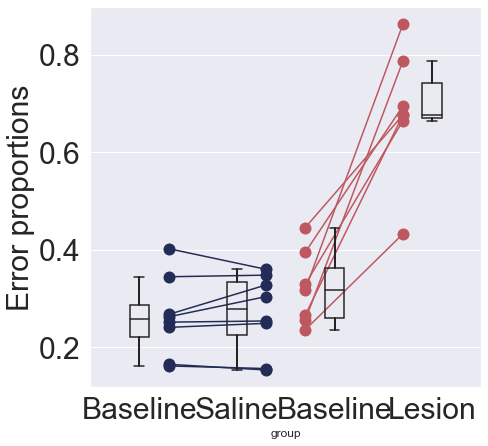

In [45]:
def extract_errors_into_df(input_):

    correct = []
    error = []
    other = []

    for i in range (3):
        for e in range(3):
            if e == 0:
                correct = correct + [list(np.array(input_[i])[:,e])]
            if e == 1:
                error = error + [list(np.array(input_[i])[:,e])]
            if e == 2:
                other = other + [list(np.array(input_[i])[:,e])]


    errors = pd.DataFrame({ 'Group':['Early','Pre', 'Post'], 'correct':  correct, 
        'error': error, 'other': other })
    return errors 



c_all_errors =  [l.tolist() for l in data[control_mask][c_early_learning_mask]['error scores'].values],[l.tolist() for l in data[control_mask][c_pre_mask]['error scores'].values],[l.tolist() for l in data[control_mask][c_post_mask]['error scores'].values]
l_all_errors =  [l.tolist() for l in data[lesion_mask][l_early_learning_mask]['error scores'].values],[l.tolist() for l in data[lesion_mask][l_pre_mask]['error scores'].values],[l.tolist() for l in data[lesion_mask][l_post_mask]['error scores'].values]

c_errors = extract_errors_into_df(c_all_errors)
l_errors = extract_errors_into_df(l_all_errors)


buzz = 'error'

fig, ax = plt.subplots(1, 1,figsize=(7,7))

for i in range(len(c_all_errors[0])):
    ax.plot([0.3,1.3],[c_errors[buzz][1][i],c_errors[buzz][2][i]],'o-',color = dark_blue, alpha = 1, markersize = 12,markeredgewidth=0)
for i in range(len(l_all_errors[0])):
    ax.plot([1.7,2.7],[l_errors[buzz][1][i],l_errors[buzz][2][i]],'o-',color = dark_pink,alpha = 1, markersize = 12,markeredgewidth=0)
    
scores = c_errors.error[1] + c_errors.error[2] + l_errors.error[1] + l_errors.error[2]
type_ = ['c_baseline']*len(c_errors.error[1]) + ['c_saline']*len(c_errors.error[2]) + ['l_Baseline']*len(l_errors.error[1]) + ['l_lesion']*len(l_errors.error[2])
plot_df = pd.DataFrame({'group': type_, 'error_rate': scores})

ax=sns.boxplot( y = 'error_rate', x = 'group', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)
    
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(('Baseline', 'Saline', 'Baseline', 'Lesion'), fontsize = 15)

ax.set_ylabel('Error proportions',fontsize = 30)

ax.tick_params(axis='both', which='major', labelsize=30)


cb_mask = plot_df.group == 'c_baseline'
cl_mask = plot_df.group == 'c_saline'
lb_mask = plot_df.group == 'l_Baseline'
ll_mask = plot_df.group == 'l_lesion'

#stats
print('control baseline')
print(scipy.stats.normaltest(list(plot_df.error_rate[cb_mask])))
print('control saline')
print(scipy.stats.normaltest(list(plot_df.error_rate[cl_mask])))
if (scipy.stats.normaltest(list(plot_df.error_rate[cb_mask]))[-1] > 0.5) and (scipy.stats.normaltest(list(plot_df.error_rate[cl_mask]))[-1] > 0.5):
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ttest_rel(plot_df.error_rate[cb_mask],plot_df.error_rate[cl_mask]))
print('---------')

# print('lesion baseline')
# print(scipy.stats.normaltest(list(plot_df.error_rate[lb_mask])))
# print('lesion saline')
# print(scipy.stats.normaltest(list(plot_df.error_rate[ll_mask])))
# if (scipy.stats.normaltest(list(plot_df.error_rate[lb_mask]))[-1] > 0.5) and (scipy.stats.normaltest(list(plot_df.error_rate[ll_mask]))[-1] > 0.5):
#     print('data is normally distributed')
# else:
#     print('data is not normally distributed')
print('ony 7 data points, 8 needed for normlaity test, data assumed normal and paired t test done')
print(scipy.stats.ttest_rel(plot_df.error_rate[lb_mask],plot_df.error_rate[ll_mask]))






In [671]:
print('---------')
print('misseq stats:')
if scipy.stats.normaltest(Misseq_errors_df.error_rate.values)[-1] > 0.05:
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ttest_rel(Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 0],Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 1]))

print('---------')
print('other stats:')
if scipy.stats.normaltest(Other_errors_df.error_rate.values)[-1] > 0.05:
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ranksums(Other_errors_df.error_rate[Other_errors_df.PrePost == 0],Other_errors_df.error_rate[Other_errors_df.PrePost == 1]))

SyntaxError: invalid syntax (<ipython-input-671-b3d880b8c40b>, line 3)

In [939]:
def average_across_animals_transition_matrix(AA_transits):
    group_means = []
    for group in AA_transits:
        AA_data= []
        for animal in group:
            flat_list = [item for sublist in animal for item in sublist]
            normalised = list(np.array(flat_list) / max(flat_list))
            AA_data = AA_data + [normalised]
        concat_AA_data = conactinate_nth_items(AA_data)

        # recreate transition matrix: 
        means= [[]]*8
        count = 0
        index = 0
        for item in concat_AA_data:
            means[index] = means[index] + [np.mean(item)]
            count = count + 1
            if count == 4:
                count = 0
                index = index + 1

        group_means = group_means + [means]
    return(group_means)

In [940]:
def normalise_transition_matrix_means(group_means):
    normalised_means = []
    for e_type in group_means:

        transposed_data  = np.array(e_type).T.tolist()

        AA_data= []
        flat_list = []
        for s_port in transposed_data:
            normalised = list(np.array(s_port) / sum(s_port))
            flat_list = flat_list + normalised

            AA_data = AA_data + [flat_list]
        concat_AA_data = conactinate_nth_items(AA_data)

        # recreate transition matrix: 
        means= [[]]*4
        count = 0
        index = 0
        for item in concat_AA_data:
            means[index] = means[index] + [np.mean(item)]
            count = count + 1
            if count == 8:
                count = 0
                index = index + 1

        normalised_means = normalised_means + [np.array(means).T.tolist()]
        
    return normalised_means

In [985]:
################################################################################################################################################################
#### Filter out sessions and pull out data
################################################################################################################################################################


        
        
#         for file in os.listdir(path):
#             if 'data' in file:
#                 print(path)
#                 with open (path + file , 'rb') as fp:
#                     dat = pickle.load(fp)  
#                     dat['animal'] = [path.split('\\')[-3]]*3
#                     dat['type'] = [file_]*3
#                     data = data.append(dat)





pre_sesisons = 3
naive_sessions = 3
max_post_lesion_sessions = 5

## find largest gap between training 

for file_ in os.listdir(PATH):
    
    print(file_)
    new_path = os.path.join(PATH,file_)
    paths = glob.glob(new_path + '\*\Preprocessed\\')
    for animal_index,path in enumerate(paths):
        os.listdir(path)   
        files = os.listdir(path)

        days_between_sessions = []
        for index,current_file in enumerate(files):
            if index >10:
                date1 = files[index-1][3:11]
                date2 = current_file[3:11]
                days_between_sessions = days_between_sessions + [(days_between(date1,date2))]
            elif index > 0:
                days_between_sessions = days_between_sessions + [1]

        final_prelesion_index = np.where(np.array(days_between_sessions) == max(days_between_sessions))[0][0]

        lesion_gap = max(days_between_sessions) # days
       

        pre_lesion_files = files[final_prelesion_index-pre_sesisons+1:final_prelesion_index+1]
        post_lesion_files = files[final_prelesion_index+1:final_prelesion_index+(max_post_lesion_sessions+1)]
        naive_files = files[0:naive_sessions]

        #### Pre lesion:
        print('pre')
        bl_TransitionTypes,bl_TransitionTimes,Transitions,bl_TimeFiltered_seqs,bl_Sessions_processed = load_transitions_for_file_catagory(pre_lesion_files,path,Tlevel_filter = False)
        ### post:
        print('post')
        l_TransitionTypes,l_TransitionTimes,Transitions,l_TimeFiltered_seqs,l_Sessions_processed = load_transitions_for_file_catagory(post_lesion_files,path,Tlevel_filter = False)
        ### Naive:
        print('naive')
        n_TransitionTypes,n_TransitionTimes,Transitions,n_TimeFiltered_seqs,n_Sessions_processed = load_transitions_for_file_catagory(naive_files,path,Tlevel_filter = False)
        print('-----------------------------')
        
        Correct = [21,16,63,37,72]
        Error = [22,23,24,25,26,27,28,11,12,13,14,15,17,18,61,62,64,65,66,67,68,31,32,33,34,35,36,38,71,73,74,75,76,77,78]
        Neutral = [41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,81,82,83,84,85,86,87,88]
        catagories = [Correct,Error,Neutral]

        blscores= [[]]*3
        blcurrent_inds = [[]]*3
        lscores= [[]]*3
        lcurrent_inds = [[]]*3
        nscores= [[]]*3
        ncurrent_inds = [[]]*3


        for i in range(3): # for each session in catagory (ie. 3 baseline sessions, 3 post lesion sessions,3 naive sessions)
            blscores[i],blcurrent_inds[i] = determine_seq_scores_and_indicies(bl_TransitionTypes[i],Error)
            lscores[i],lcurrent_inds[i] = determine_seq_scores_and_indicies(l_TransitionTypes[i],Error)
            nscores[i],ncurrent_inds[i] = determine_seq_scores_and_indicies(n_TransitionTypes[i],Error)

        bl_lengths = []
        l_lengths = []
        for i in range(3):
            bl_lengths = bl_lengths + [len(bl_TransitionTypes[i])]
            l_lengths = l_lengths + [len(l_TransitionTypes[i])]


        bl_proportions = np.array(blscores)/np.array(bl_lengths)
        l_proportions = np.array(lscores)/np.array(l_lengths)

        #define current animal
        CurrentAnimal = path.split('\\')[-3]
        
        ## save out error props 
        if file_ == 'control':
            if animal_index == 0:
                c_errors = pd.DataFrame({ 'Animal':[CurrentAnimal], 'Pre1':  bl_proportions[0], 'Pre2':  bl_proportions[1],'Pre3':  bl_proportions[2],'Post1':  l_proportions[0],'Post2':  l_proportions[1],'Post3':  l_proportions[2]})
            else:
                new_df = pd.DataFrame({ 'Animal':[CurrentAnimal], 'Pre1':  bl_proportions[0], 'Pre2':  bl_proportions[1],'Pre3':  bl_proportions[2],'Post1':  l_proportions[0],'Post2':  l_proportions[1],'Post3':  l_proportions[2]})
                c_errors = c_errors.append(new_df)

        else:
            if animal_index == 0:
                L_errors = pd.DataFrame({ 'Animal':[CurrentAnimal], 'Pre1':  bl_proportions[0], 'Pre2':  bl_proportions[1],'Pre3':  bl_proportions[2],'Post1':  l_proportions[0],'Post2':  l_proportions[1],'Post3':  l_proportions[2]})
            else:
                new_df = pd.DataFrame({ 'Animal':[CurrentAnimal], 'Pre1':  bl_proportions[0], 'Pre2':  bl_proportions[1],'Pre3':  bl_proportions[2],'Post1':  l_proportions[0],'Post2':  l_proportions[1],'Post3':  l_proportions[2]})
                L_errors = L_errors.append(new_df)


        Repeats = [22,11,66,33,77]
        Missequence= [26,23,12,13,62,61,32,31,36,71,76,73,27,17,67] 
        Other_Error = [24,25,28,14,15,18,64,65,68,34,35,38,74,75,78] 

        bl_TransitionTypes_flattened = [item for sublist in bl_TransitionTypes for item in sublist] 
        l_TransitionTypes_flattened = [item for sublist in l_TransitionTypes for item in sublist]
        bl_TransitionTimes_flattened = [item for sublist in bl_TransitionTimes for item in sublist] 
        l_TransitionTimes_flattened = [item for sublist in l_TransitionTimes for item in sublist] 

        bl_repeat_rate = determine_seq_scores_and_indicies(bl_TransitionTypes_flattened,Repeats)[0] / len(bl_TransitionTypes_flattened)
        bl_Missequence_rate = determine_seq_scores_and_indicies(bl_TransitionTypes_flattened,Missequence)[0] / len(bl_TransitionTypes_flattened)
        bl_other_rate = determine_seq_scores_and_indicies(bl_TransitionTypes_flattened,Other_Error)[0] / len(bl_TransitionTypes_flattened)

        l_repeat_rate = determine_seq_scores_and_indicies(l_TransitionTypes_flattened,Repeats)[0] / len(l_TransitionTypes_flattened)
        l_Missequence_rate = determine_seq_scores_and_indicies(l_TransitionTypes_flattened,Missequence)[0] / len(l_TransitionTypes_flattened)
        l_other_rate = determine_seq_scores_and_indicies(l_TransitionTypes_flattened,Other_Error)[0] / len(l_TransitionTypes_flattened)


        if file_ == 'control':
            if animal_index == 0:
                C_error_rates_breakdown = pd.DataFrame({ 'Animal':[CurrentAnimal], 'PreRepeat':  bl_repeat_rate, 'PreMisseq': bl_Missequence_rate,'Preother': bl_other_rate,'PostRepeat':  l_repeat_rate,'PostMissseq': l_Missequence_rate,'PostOther': l_other_rate,
                                                        'pre_transition_types': [bl_TransitionTypes],'pre_transition_times': [bl_TransitionTimes],'post_transition_types': [l_TransitionTypes],'post_transition_times': [l_TransitionTimes]})
            else:
                new_df = pd.DataFrame({ 'Animal':[CurrentAnimal], 'PreRepeat':  bl_repeat_rate, 'PreMisseq': bl_Missequence_rate,'Preother': bl_other_rate,'PostRepeat':  l_repeat_rate,'PostMissseq': l_Missequence_rate,'PostOther': l_other_rate,
                                                        'pre_transition_types':[bl_TransitionTypes],'pre_transition_times': [bl_TransitionTimes],'post_transition_types': [l_TransitionTypes],'post_transition_times': [l_TransitionTimes]})
                C_error_rates_breakdown = C_error_rates_breakdown.append(new_df)

        else:
            if animal_index == 0:
                l_error_rates_breakdown = pd.DataFrame({ 'Animal':[CurrentAnimal], 'PreRepeat':  bl_repeat_rate, 'PreMisseq': bl_Missequence_rate,'Preother': bl_other_rate,'PostRepeat':  l_repeat_rate,'PostMissseq': l_Missequence_rate,'PostOther': l_other_rate,
                                                        'pre_transition_types': [bl_TransitionTypes],'pre_transition_times': [bl_TransitionTimes],'post_transition_types': [l_TransitionTypes],'post_transition_times': [l_TransitionTimes]})
            else:
                new_df = pd.DataFrame({ 'Animal':[CurrentAnimal], 'PreRepeat':  bl_repeat_rate, 'PreMisseq': bl_Missequence_rate,'Preother': bl_other_rate,'PostRepeat':  l_repeat_rate,'PostMissseq': l_Missequence_rate,'PostOther': l_other_rate,
                                                        'pre_transition_types': [bl_TransitionTypes],'pre_transition_times': [bl_TransitionTimes],'post_transition_types': [l_TransitionTypes],'post_transition_times': [l_TransitionTimes]})
                l_error_rates_breakdown = l_error_rates_breakdown.append(new_df)

control
pre
32_20210617_113213_Thu
33_20210618_115529_Fri
34_20210621_092749_Mon
post
35_20210625_131539_Fri
36_20210628_115834_Mon
37_20210629_112247_Tue
38_20210630_121243_Wed
39_20210701_113049_Thu
naive
00_20210503_144501_Mon
01_20210504_120919_Tue
02_20210505_141158_Wed
-----------------------------
pre
30_20211103_092039_Wed
31_20211104_123350_Thu
32_20211104_144245_Thu
post
33_20211115_124248_Mon
34_20211116_141724_Tue
35_20211117_095721_Wed
naive
00_20210906_144554_Mon
01_20210907_140043_Tue
02_20210908_125046_Wed
-----------------------------
pre
26_20211101_115118_Mon
27_20211103_091932_Wed
28_20211104_123622_Thu
post
29_20211115_124433_Mon
30_20211116_150118_Tue
31_20211117_100048_Wed
naive
00_20210906_154818_Mon
01_20210907_150033_Tue
02_20210908_134545_Wed
-----------------------------
pre
20_20220222_122801_Tue
21_20220223_131203_Wed
22_20220224_134423_Thu
post
23_20220307_095248_Mon
24_20220308_131103_Tue
25_20220309_102739_Wed
26_20220310_111353_Thu
27_20220311_103842_F

In [1051]:
## merge across sessions for each animal - creates a list of transitions types (across sessions) for each animals 
Pre_TransitionTypes_flattened = []
Post_TransitionTypes_flattened = []
for animal in l_error_rates_breakdown.Animal.values:
    mask = l_error_rates_breakdown.Animal.values == animal 
    Pre_TransitionTypes_flattened = Pre_TransitionTypes_flattened + [[item for sublist in list(l_error_rates_breakdown[mask].pre_transition_types[0]) for item in sublist] ]
    Post_TransitionTypes_flattened = Post_TransitionTypes_flattened + [[item for sublist in list(l_error_rates_breakdown[mask].post_transition_types[0]) for item in sublist] ]
    
## work out port props for each animal:    

AA_port_proportions = []
for animal_ in Pre_TransitionTypes_flattened:
    ports= []
    for index, transit in enumerate(animal_):
        ports = ports + [int(str(transit)[0])]
        if index == len(animal_)-1:
            ports = ports + [int(str(transit)[-1])] 
    port_proportions=[animal,'pre']
    for i in range(1,9):
        port_proportions = port_proportions + [sum(np.array(ports) == i)/len(ports)]
    AA_port_proportions = AA_port_proportions + [port_proportions]


for animal_ in Post_TransitionTypes_flattened:
    ports= []
    for index, transit in enumerate(animal_):
        ports = ports + [int(str(transit)[0])]
        if index == len(animal_)-1:
            ports = ports + [int(str(transit)[-1])] 
    port_proportions=[animal,'post']
    for i in range(1,9):
        port_proportions = port_proportions + [sum(np.array(ports) == i)/len(ports)]
    AA_port_proportions = AA_port_proportions + [port_proportions]

poke_proportions_df = pd.DataFrame(AA_port_proportions, columns = ['animal','group','p1','p2','p3','p4','p5','p6','p7','p8'])  

mean ratios per port: [11.67766409 17.76602237 24.18086835  1.44490301  1.22682658 14.28164269
 28.13756311  1.2845098 ]
SEM per port: [2.39083529 1.71213442 2.52175386 0.32263668 0.56480084 2.19397919
 5.19764718 0.3698819 ]


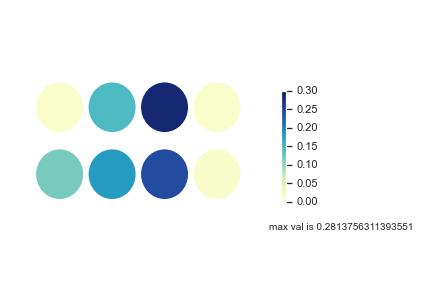

In [1291]:

nrow = 1 
ncol = 1
counter = 0
fig, axs = plt.subplots(nrow, ncol,figsize=(5, 5))

for ind, ax in enumerate(fig.axes):
    

    mask = poke_proportions_df.group == 'post'
    post_poke_proportions_df= poke_proportions_df[mask]


    ax.set_ylim([0, 5])
    ax.set_xlim([0, 5])

    colormap = plt.cm.get_cmap('YlGnBu') # 'plasma' or 'viridis'


    color_vals = [np.mean(post_poke_proportions_df.p1),np.mean(post_poke_proportions_df.p2),np.mean(post_poke_proportions_df.p3),np.mean(post_poke_proportions_df.p4),
                  np.mean(post_poke_proportions_df.p5),np.mean(post_poke_proportions_df.p6),np.mean(post_poke_proportions_df.p7),np.mean(post_poke_proportions_df.p8)]

    normalised_colour = np.array(color_vals)/0.3

    x = [1,2,3,4,1,2,3,4]
    y = [2,2,2,2,3.2,3.2,3.2,3.2]

    circles_ = []
    for i in range(8):
        color_ = colormap(normalised_colour[i])
        circles_ = circles_ + [plt.Circle((x[i], y[i]), 0.4,fill=True, linewidth=5, color = color_)]
    for i in range(8):
        ax.add_artist(circles_[i])

    plt.axis('off')
#     plt.text(0.7,1,('Port_Poke_proportions for Session '), horizontalalignment='left', size=20)





    # sc = plt.scatter(x, y, c=colors)

    sm = plt.cm.ScalarMappable(cmap=colormap)
    sm.set_clim(vmin=0, vmax=0.3)
    plt.text(5,1,('max val is '+ str(max(color_vals))),size=10)

    plt.colorbar(sm,fraction=0.02, pad=0.04)
    
    
SEM = [scipy.stats.sem(post_poke_proportions_df.p1),scipy.stats.sem(post_poke_proportions_df.p2),scipy.stats.sem(post_poke_proportions_df.p3),scipy.stats.sem(post_poke_proportions_df.p4),
              scipy.stats.sem(post_poke_proportions_df.p5),scipy.stats.sem(post_poke_proportions_df.p6),scipy.stats.sem(post_poke_proportions_df.p7),scipy.stats.sem(post_poke_proportions_df.p8)]

print('mean ratios per port: ' + str(np.array(color_vals)*100))
print('SEM per port: ' + str(np.array(SEM)*100))



#     poke_data = [poke_proportions_df.p1.values,poke_proportions_df.p2.values,poke_proportions_df.p3.values,poke_proportions_df.p4.values,
#                   poke_proportions_df.p5.values,poke_proportions_df.p6.values,poke_proportions_df.p7.values,poke_proportions_df.p8.values]

# SaveFig('poke_port_props.pdf',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

In [1062]:
l_error_rates_breakdown

,Animal,PreRepeat,PreMisseq,Preother,PostRepeat,PostMissseq,PostOther,pre_transition_types,pre_transition_times,post_transition_types,post_transition_times
0,EJT154,0.190694,0.137300,0.001373,0.422143,0.238571,0.004286,"[[16, 67, 73, 21, 44, 22, 26, 67, 77, 77, 77, ...","[[0.987099999999998, 1.6277000000000008, 0.412...","[[28, 87, 77, 77, 77, 77, 37, 77, 77, 73, 37, ...","[[1.0262000000000029, 0.6505999999999972, 0.01..."
0,EJT155,0.148672,0.085711,0.001968,0.220109,0.207322,0.005355,"[[11, 11, 12, 22, 23, 33, 37, 76, 66, 65, 12, ...","[[0.1126000000000004, 0.4693999999999931, 0.95...","[[12, 22, 23, 37, 73, 32, 21, 13, 33, 33, 37, ...","[[0.7670000000000003, 0.0001999999999995, 0.41..."
0,EJT156,0.199075,0.117385,0.002095,0.699822,0.154529,0.008881,"[[12, 26, 66, 66, 67, 63, 37, 77, 75, 56, 67, ...","[[1.2249999999999943, 0.5729999999999933, 1.79...","[[33, 77, 77, 73, 47, 77, 77, 77, 33, 37, 44, ...","[[0.4294999999999902, 0.1621000000000094, 0.83..."
0,EJT157,0.135377,0.128991,0.001916,0.298228,0.366076,0.012658,"[[88, 41, 23, 37, 76, 66, 67, 78, 84, 44, 44, ...","[[0.0067000000000092, 1.332800000000006, 0.478...","[[87, 27, 76, 61, 11, 21, 11, 16, 62, 22, 23, ...","[[0.4681000000000015, 0.8424999999999976, 0.98..."
0,EJT159,0.251421,0.193647,0.000801,0.366488,0.307100,0.003237,"[[23, 37, 78, 83, 37, 71, 13, 37, 76, 67, 73, ...","[[0.6437000000000097, 0.452699999999993, 1.323...","[[77, 37, 88, 63, 37, 33, 37, 72, 21, 16, 67, ...","[[0.0625, 0.5226000000000113, 0.14809999999999..."
0,EJT161,0.162704,0.092476,0.001002,0.544041,0.218653,0.024870,"[[66, 66, 66, 32, 21, 16, 66, 63, 37, 21, 13, ...","[[0.0840999999999994, 0.1423000000000058, 0.47...","[[44, 44, 44, 44, 44, 44, 44, 44, 47, 42, 26, ...","[[0.0080999999999988, 0.0001999999999995, 0.04..."
0,EJT85,0.320729,0.072939,0.001454,0.486496,0.191214,0.017645,"[[78, 23, 33, 77, 15, 56, 62, 22, 22, 22, 23, ...","[[0.6308000000000007, 1.3369, 0.11749999999999...","[[66, 66, 55, 77, 77, 87, 77, 77, 73, 36, 62, ...","[[0.5858000000000629, 0.0372999999999592, 0.05..."


In [1063]:
## merge across sessions for each animal - creates a list of transitions types (across sessions) for each animals 
Pre_TransitionTypes_flattened = []
Post_TransitionTypes_flattened = []
Pre_TransitionTimes_flattened = []
Post_TransitionTimes_flattened = []
for animal in l_error_rates_breakdown.Animal.values:
    mask = l_error_rates_breakdown.Animal.values == animal 
    Pre_TransitionTypes_flattened = Pre_TransitionTypes_flattened + [[item for sublist in list(l_error_rates_breakdown[mask].pre_transition_types[0]) for item in sublist] ]
    Post_TransitionTypes_flattened = Post_TransitionTypes_flattened + [[item for sublist in list(l_error_rates_breakdown[mask].post_transition_types[0]) for item in sublist] ]
    Pre_TransitionTimes_flattened = Pre_TransitionTimes_flattened + [[item for sublist in list(l_error_rates_breakdown[mask].pre_transition_times[0]) for item in sublist] ]
    Post_TransitionTimes_flattened = Post_TransitionTimes_flattened + [[item for sublist in list(l_error_rates_breakdown[mask].post_transition_times[0]) for item in sublist] ]

In [1231]:
pre_transition_means = []
pre_transition_std = []
for index, animal_ in enumerate(Pre_TransitionTypes_flattened):
    transitions = [21,16,63,37]
    transition_times = []
    for i,transit in enumerate(transitions):
        inds = np.where(np.array(animal_) == transit)
        transition_times = transition_times + list(np.array(Pre_TransitionTimes_flattened[index])[inds])
    pre_transition_means = pre_transition_means + [np.mean(transition_times)]
    pre_transition_std = pre_transition_std + [np.std(transition_times)]

post_transition_means = []
post_transition_std = []
for index, animal_ in enumerate(Post_TransitionTypes_flattened):
    transitions = [21,16,63,37]
    
    transition_times = []
    for i,transit in enumerate(transitions):
        inds = np.where(np.array(animal_) == transit)
        transition_times = transition_times + list(np.array(Post_TransitionTimes_flattened[index])[inds])

    post_transition_means = post_transition_means + [np.mean(transition_times)]
    post_transition_std = post_transition_std+ [np.std(transition_times)]

In [1239]:
pre_transition_means[i],post_transition_means[i]

(0.37426784605834806, 0.7221295221842988)

---- too few samples, assumed normal
Ttest_relResult(statistic=-3.6094112513359913, pvalue=0.01123887685706)


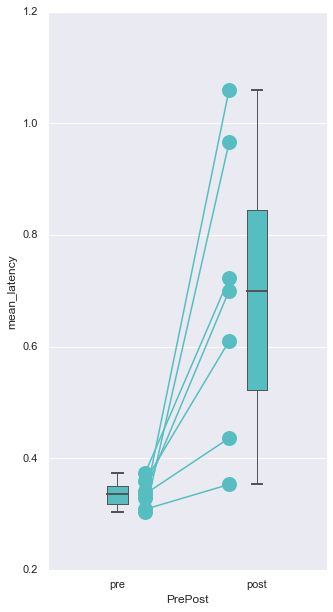

In [1276]:
#transition times

ort = 'v'

fig,ax = plt.subplots(1, 1, figsize=(5, 10))
for i in range(len(pre_transition_means)):
    ax.plot((0.2,0.8),(pre_transition_means[i],post_transition_means[i]),'o-',color ='#56BEC1',markeredgecolor = 'none',alpha = 1, markersize = 15,markeredgewidth=0)
#     ax.plot([*len(post_transition_means[i]),post_transition_means[i],'o',color ='#56BEC1',markeredgecolor = 'none',alpha = 1, markersize = 9,markeredgewidth=0)

    plot_df = pd.DataFrame({'PrePost':['pre']*len(pre_transition_means) + ['post']*len(post_transition_means) ,'mean_latency': pre_transition_means + post_transition_means})

    ax=sns.boxplot( x = 'PrePost', y = 'mean_latency', data = plot_df, color = '#56BEC1', width = .15, zorder = 10,\
    showcaps = True, boxprops = {'facecolor':'#56BEC1', "zorder":10,'linewidth':1},\
    showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
       saturation = 1, orient = ort, ax = ax)

    
    ax.set_ylim([0.2, 1.2])
    
# print('post' + str(i))
# print(scipy.stats.normaltest(pre_transition_std))

# print('pre' + str(i))
# print(scipy.stats.normaltest(post_transition_std))

print('---- too few samples, assumed normal')

print(scipy.stats.ttest_rel(pre_transition_means,post_transition_means))

# SaveFig('transit_times.pdf',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

---- too few samples, assumed normal
Ttest_relResult(statistic=-4.219806142805741, pvalue=0.005562454813364773)


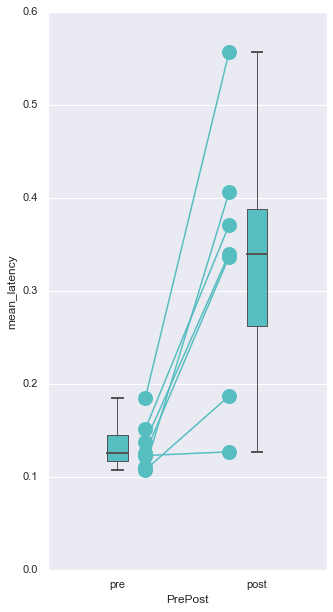

In [1277]:
#transition variability

ort = 'v'

fig,ax = plt.subplots(1, 1, figsize=(5, 10))
for i in range(len(pre_transition_std)):
    ax.plot((0.2,0.8),(pre_transition_std[i],post_transition_std[i]),'o-',color ='#56BEC1',markeredgecolor = 'none',alpha = 1, markersize = 15,markeredgewidth=0)
#     ax.plot([*len(post_transition_means[i]),post_transition_means[i],'o',color ='#56BEC1',markeredgecolor = 'none',alpha = 1, markersize = 9,markeredgewidth=0)

    plot_df = pd.DataFrame({'PrePost':['pre']*len(pre_transition_std) + ['post']*len(post_transition_std) ,'mean_latency': pre_transition_std + post_transition_std})

    ax=sns.boxplot( x = 'PrePost', y = 'mean_latency', data = plot_df, color = '#56BEC1', width = .15, zorder = 10,\
    showcaps = True, boxprops = {'facecolor':'#56BEC1', "zorder":10,'linewidth':1},\
    showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
       saturation = 1, orient = ort, ax = ax)

    
    ax.set_ylim([0, 0.6])


# print('post' + str(i))
# print(scipy.stats.normaltest(pre_transition_std))

# print('pre' + str(i))
# print(scipy.stats.normaltest(post_transition_std))

print('---- too few samples, assumed normal')

print(scipy.stats.ttest_rel(pre_transition_std,post_transition_std))
    
# SaveFig('stand_dev.pdf',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

[0.1377056816460303,
 0.10740872093258433,
 0.18512054805401867,
 0.12590789238994077,
 0.12280746801503288,
 0.1101994482454245,
 0.1515611939472374]

---- too few samples, assumed normal
Ttest_relResult(statistic=-4.219806142805741, pvalue=0.005562454813364773)


In [1183]:
#stats
print('control stats:')
if scipy.stats.normaltest(list(plot_df.error_rate[cb_mask]) + list(plot_df.error_rate[cl_mask]))[-1] > 0.05:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

print('---------')
#stats
print('lesion stats:')
if scipy.stats.normaltest(list(plot_df.error_rate[lb_mask]) + list(plot_df.error_rate[ll_mask]))[-1] > 0.05:
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ttest_rel(plot_df.error_rate[lb_mask],plot_df.error_rate[ll_mask]))

[[0.35086232798165684,
  0.3436998545454493,
  0.3083303405572728,
  0.38753608903020453,
  0.32443264604811506,
  0.27610806156101164,
  0.3248862385321136],
 [0.3297641961231388,
  0.34031336370539816,
  0.32298018867924017,
  0.40508142857143076,
  0.2986184107442605,
  0.34737168556902565,
  0.40709349794238153],
 [0.41165927189988605,
  0.35038035062088857,
  0.4512591871780209,
  0.3650503478260851,
  0.34183269230769076,
  0.3236958142576871,
  0.369380988274706],
 [0.29147098310956987,
  0.3118661764705868,
  0.2401584801207879,
  0.2982805725971386,
  0.2741720681265243,
  0.27376745579862344,
  0.39480685714285674]]

In [1181]:
t_code = ['T1']*len(pre_transition_means[0]) + ['T2']*len(pre_transition_means[1]) + ['T3']*len(pre_transition_means[2]) + ['T4']*len(pre_transition_means[3])
                                                                                                                                
plot_df1 = pd.DataFrame({'Transition':t_code,'Time':[item for sublist in pre_transition_means for item in sublist] })
#     plot_df= plot_df.append(tempt_df)

t_code = ['T1_']*len(post_transition_means[0]) + ['T2_']*len(post_transition_means[1]) + ['T3_']*len(post_transition_means[2]) + ['T4_']*len(post_transition_means[3])
                                                                                                                                
plot_df2 = pd.DataFrame({'Transition':t_code,'Time':[item for sublist in post_transition_means for item in sublist] })
#     plot_df= plot_df.append(tempt_df)

[Text(0, 0, 'Transition 1'),
 Text(1, 0, 'Transition 2'),
 Text(2, 0, 'Transition 3'),
 Text(3, 0, 'Transition 4')]

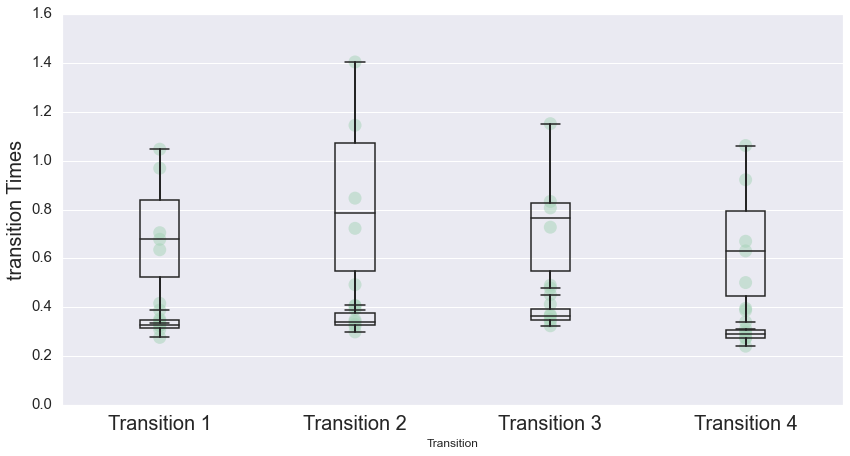

In [1182]:
fig,ax = plt.subplots(1, 1, figsize=(14, 7))

ax=sns.stripplot( y = 'Time', x = 'Transition', data = plot_df1, color = '#A5D3B7', edgecolor = "white",
                 size = 13, jitter = 0, zorder = 1, orient = 'v',ax = ax,alpha = 0.5)

ax=sns.boxplot (y = 'Time', x = 'Transition', data = plot_df1, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

ax=sns.stripplot( y = 'Time', x = 'Transition', data = plot_df2, color = '#A5D3B7', edgecolor = "white",
                 size = 13, jitter = 0, zorder = 1, orient = 'v',ax = ax,alpha = 0.5)

ax=sns.boxplot (y = 'Time', x = 'Transition', data = plot_df2, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

ax.set_ylabel('transition Times',size = 20)
ax.tick_params(axis="y", labelsize=15)
# ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 


ax.set_xticklabels(['Transition 1','Transition 2','Transition 3','Transition 4' ], fontsize = 20)

In [1157]:
t_code = ['T1']*len(post_transition_means[0]) + ['T2']*len(post_transition_means[1]) + ['T3']*len(post_transition_means[2]) + ['T4']*len(post_transition_means[3])
                                                                                                                                
plot_df = pd.DataFrame({'Transition':t_code,'Time':[item for sublist in post_transition_means for item in sublist] })
#     plot_df= plot_df.append(tempt_df)

[Text(0, 0, 'Transition 1'),
 Text(0, 1, 'Transition 2'),
 Text(0, 2, 'Transition 3'),
 Text(0, 3, 'Transition 4')]

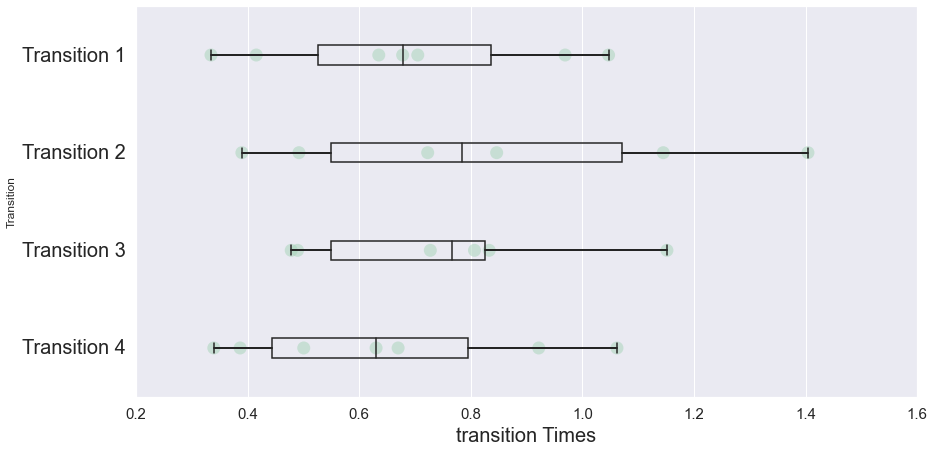

In [1158]:
fig,ax = plt.subplots(1, 1, figsize=(14, 7))

ax=sns.stripplot( x = 'Time', y = 'Transition', data = plot_df, color = '#A5D3B7', edgecolor = "white",
                 size = 13, jitter = 0, zorder = 1, orient = 'h',ax = ax,alpha = 0.5)

ax=sns.boxplot (x = 'Time', y = 'Transition', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'h',ax = ax)

ax.set_xlabel('transition Times',size = 20)
ax.tick_params(axis="x", labelsize=15)
# ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 


ax.set_yticklabels(['Transition 1','Transition 2','Transition 3','Transition 4' ], fontsize = 20)

# SaveFig('Transition_times.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')


# #stats
# print(scipy.stats.normaltest(plot_df.Time[plot_df.Transition == 'T1']))
# print(scipy.stats.normaltest(plot_df.Time[plot_df.Transition == 'T2']))
# print(scipy.stats.normaltest(plot_df.Time[plot_df.Transition == 'T3']))
# print(scipy.stats.normaltest(plot_df.Time[plot_df.Transition == 'T4']))

# print('not all are normally distributed: Kruskal–Wallis used:')


# print(scipy.stats.kruskal(plot_df.Time[plot_df.Transition == 'T1'],plot_df.Time[plot_df.Transition == 'T2'],plot_df.Time[plot_df.Transition == 'T3'],plot_df.Time[plot_df.Transition == 'T4']))

# import scikit_posthocs as sp
# post_hoc_comp_dunn_test = sp.posthoc_dunn([plot_df.Time[plot_df.Transition == 'T1'],plot_df.Time[plot_df.Transition == 'T2'],plot_df.Time[plot_df.Transition == 'T3'],plot_df.Time[plot_df.Transition == 'T4']], p_adjust = 'bonferroni')
# print(post_hoc_comp_dunn_test)

In [1159]:
pre_transition_std


[[0.1248142034666355,
  0.13101909634573383,
  0.14322446665026692,
  0.14385594085143397,
  0.17442424508449567,
  0.13422135024686252,
  0.10262056235941035],
 [0.14627789139749794,
  0.09127422624826814,
  0.06882266819483074,
  0.15041723770219737,
  0.08577801246622911,
  0.11688692808769179,
  0.1238239145966303],
 [0.14102210431121479,
  0.09823654373763557,
  0.26940517142051945,
  0.09569208315289064,
  0.12990060592708436,
  0.09094175348334871,
  0.18040439363155059],
 [0.1120057117732994,
  0.10034044144906151,
  0.1309214379359946,
  0.07854482399991276,
  0.06864730557622949,
  0.07988740294218007,
  0.17172470717698501]]

[Text(0, 0, 'Transition 1'),
 Text(0, 1, 'Transition 2'),
 Text(0, 2, 'Transition 3'),
 Text(0, 3, 'Transition 4')]

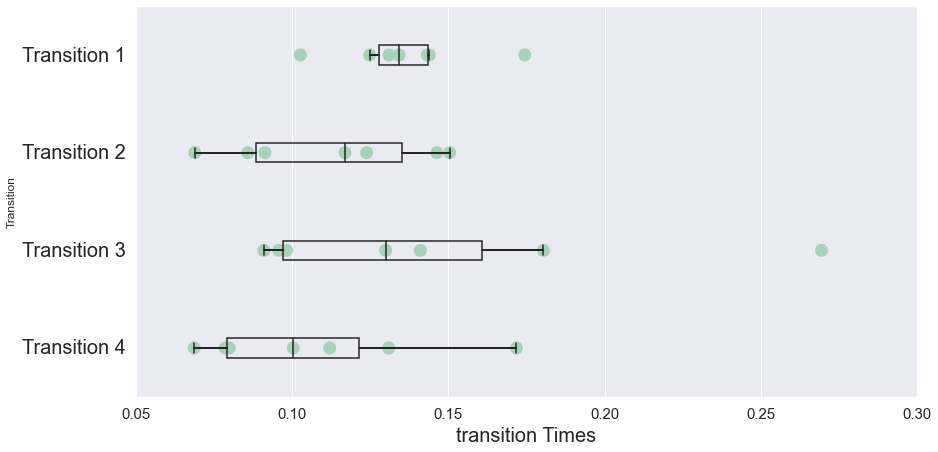

In [1165]:
t_code = ['T1']*len(pre_transition_std[0]) + ['T2']*len(pre_transition_std[1]) + ['T3']*len(pre_transition_std[2]) + ['T4']*len(pre_transition_std[3])
                                                                                                                                
plot_df = pd.DataFrame({'Transition':t_code,'Time':[item for sublist in pre_transition_std for item in sublist] })
#     plot_df= plot_df.append(tempt_df)

fig,ax = plt.subplots(1, 1, figsize=(14, 7))

ax=sns.stripplot( x = 'Time', y = 'Transition', data = plot_df, color = '#A5D3B7', edgecolor = "white",
                 size = 13, jitter = 0, zorder = 1, orient = 'h',ax = ax,alpha = 1)

ax=sns.boxplot (x = 'Time', y = 'Transition', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'h',ax = ax)

ax.set_xlabel('transition Times',size = 20)
ax.tick_params(axis="x", labelsize=15)
# ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 


ax.set_yticklabels(['Transition 1','Transition 2','Transition 3','Transition 4' ], fontsize = 20)

In [1169]:
t_code = ['T1']*len(post_transition_std[0]) + ['T2']*len(post_transition_std[1]) + ['T3']*len(post_transition_std[2]) + ['T4']*len(post_transition_std[3])
                                                                                                                                
plot_df = pd.DataFrame({'Transition':t_code,'Time':[item for sublist in post_transition_std for item in sublist] })
#     plot_df= plot_df.append(tempt_df)

[Text(0, 0, 'Transition 1'),
 Text(0, 1, 'Transition 2'),
 Text(0, 2, 'Transition 3'),
 Text(0, 3, 'Transition 4')]

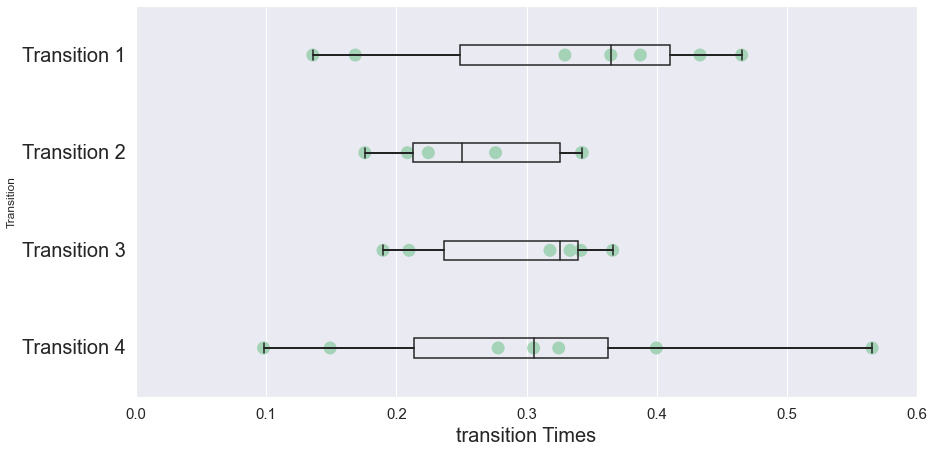

In [1170]:
fig,ax = plt.subplots(1, 1, figsize=(14, 7))

ax=sns.stripplot( x = 'Time', y = 'Transition', data = plot_df, color = '#A5D3B7', edgecolor = "white",
                 size = 13, jitter = 0, zorder = 1, orient = 'h',ax = ax,alpha = 1)

ax=sns.boxplot (x = 'Time', y = 'Transition', data = plot_df, color = dark_blue, width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'h',ax = ax)



ax.set_xlabel('transition Times',size = 20)
ax.tick_params(axis="x", labelsize=15)
# ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 


ax.set_yticklabels(['Transition 1','Transition 2','Transition 3','Transition 4' ], fontsize = 20)

In [1040]:
poke_proportions_df

,animal,group,p1,p2,p3,p4,p5,p6,p7,p8
0,EJT85,post,0.11879,0.156228,0.195464,0.018719,0.039597,0.138589,0.315695,0.016919


In [976]:
AA_port_proportions_pre

[]

In [975]:
poke_proportions_df

,animal,p1,p2,p3,p4,p5,p6,p7,p8
0,EJT101,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
1,EJT147,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
2,EJT148,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
3,EJT174,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
4,EJT175,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
5,EJT176,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
6,EJT177,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301
7,EJT99,0.181225,0.2098,0.230607,0.002014,0.0,0.226388,0.147665,0.002301


In [344]:
AA_port_proportions= []

for animal in range(len(data.animal.values)):
    ports= []
    for session in np.unique(data.trials_4000to5000_session[animal]):
        session_mask = np.array(data.trials_4000to5000_session[animal]) == session


[33,
 31,
 11,
 42,
 22,
 11,
 11,
 16,
 22,
 22,
 26,
 74,
 83,
 21,
 11,
 11,
 16,
 66,
 63,
 33,
 37,
 44,
 88,
 88,
 17,
 73,
 33,
 33,
 26,
 63,
 37,
 43,
 33,
 11,
 32,
 26,
 67,
 77,
 76,
 63,
 33,
 37,
 48,
 11,
 63,
 33,
 37,
 37,
 77,
 31,
 16,
 66,
 66,
 37,
 72,
 21,
 16,
 66,
 66,
 63,
 37,
 72,
 21,
 16,
 66,
 66,
 11,
 11,
 66,
 66,
 62,
 21,
 11,
 16,
 66,
 37,
 16,
 62,
 22,
 26,
 63,
 37,
 77,
 22,
 21,
 16,
 63,
 37,
 77,
 23,
 37,
 77,
 77,
 72,
 26,
 66,
 66,
 66,
 66,
 61,
 16,
 63,
 37,
 72,
 21,
 16,
 63,
 37,
 72,
 21,
 11,
 11,
 16,
 63,
 33,
 37,
 72,
 21,
 16,
 63,
 33,
 37,
 72,
 21,
 16,
 63,
 33,
 37,
 72,
 21,
 16,
 63,
 33,
 37,
 77,
 76,
 61,
 34,
 12,
 23,
 32,
 21,
 16,
 63,
 33,
 37,
 72,
 21,
 16,
 66,
 61,
 16,
 66,
 62,
 21,
 84,
 21,
 16,
 63,
 37,
 72,
 21,
 11,
 12,
 21,
 16,
 66,
 63,
 37,
 77,
 21,
 11,
 16,
 63,
 37,
 77,
 21,
 16,
 66,
 63,
 37,
 77,
 77,
 21,
 16,
 66,
 66,
 63,
 37,
 72,
 21,
 16,
 66,
 63,
 33,
 37,
 73,
 33,
 32,
 21,


In [312]:
## for each session pull out all the first ports that was entered, for the last transiton also take the second one as it wont appear in a subsequent transition
AA_port_proportions= []

for animal in range(len(data.animal.values)):
    ports= []
    for session in np.unique(data.trials_4000to5000_session[animal]):
        session_mask = np.array(data.trials_4000to5000_session[animal]) == session
        for index, transit in enumerate(np.array(data.trials_4000to5000_transitions[animal])[session_mask]):
            ports = ports + [int(str(transit)[0])]
            if index == len(np.array(data.trials_4000to5000_transitions[animal])[session_mask])-1:
                ports = ports + [int(str(transit)[-1])]

    port_proportions=[data.animal.values[animal]]
    for i in range(1,9):
        port_proportions = port_proportions + [sum(np.array(ports) == i)/len(ports)]

    AA_port_proportions = AA_port_proportions + [port_proportions]

poke_proportions_df = pd.DataFrame(AA_port_proportions, columns = ['animal','p1','p2','p3','p4','p5','p6','p7','p8'])


fig,ax = plt.subplots(1, 1, figsize=(20, 20))
ax.set_ylim([0, 5])
ax.set_xlim([0, 5])

colormap = plt.cm.get_cmap('viridis') # 'plasma' or 'viridis'


color_vals = [np.mean(poke_proportions_df.p1),np.mean(poke_proportions_df.p2),np.mean(poke_proportions_df.p3),np.mean(poke_proportions_df.p4),
              np.mean(poke_proportions_df.p5),np.mean(poke_proportions_df.p6),np.mean(poke_proportions_df.p7),np.mean(poke_proportions_df.p8)]

normalised_colour = np.array(color_vals)/max(color_vals)

x = [1,2,3,4,1,2,3,4]
y = [2,2,2,2,3.2,3.2,3.2,3.2]

circles_ = []
for i in range(8):
    color_ = colormap(normalised_colour[i])
    circles_ = circles_ + [plt.Circle((x[i], y[i]), 0.4,fill=True, linewidth=5, color = color_)]
for i in range(8):
    ax.add_artist(circles_[i])

plt.axis('off')
plt.text(0.7,1,('Port_Poke_proportions for Session '), horizontalalignment='left', size=20)


# sc = plt.scatter(x, y, c=colors)

sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=max(color_vals))
plt.text(5,1,('max val is '+ str(max(color_vals))),size=10)

plt.colorbar(sm,fraction=0.02, pad=0.04)


poke_data = [poke_proportions_df.p1.values,poke_proportions_df.p2.values,poke_proportions_df.p3.values,poke_proportions_df.p4.values,
              poke_proportions_df.p5.values,poke_proportions_df.p6.values,poke_proportions_df.p7.values,poke_proportions_df.p8.values]

nrow = 2 
ncol = 4
fig, axs = plt.subplots(nrow, ncol,figsize=(20, 5))

for ind, ax in enumerate(fig.axes):

    ax.plot(poke_data[ind],np.zeros(len(animals)),'o',alpha = 0.4, color = dark_blue,markersize = 10)
    ax.plot(color_vals[ind],0,'|',color = dark_pink,markersize = 40, markeredgewidth = 5)
    ax.set_xlim([0, np.max(poke_data)])
    
    ax.set_title('Port ' + str(ind + 1), size=20)

# SaveFig('PokeProportions.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_behaviour_figures\figs\\')


[[0.6308000000000007,
  1.3369,
  0.1174999999999997,
  0.4589999999999961,
  1.9557000000000075,
  0.639899999999983,
  0.981099999999998,
  0.0002000000000066,
  0.0165000000000077,
  0.1238999999999919,
  0.8620999999999981,
  0.9087000000000104,
  0.0475999999999885,
  0.7749999999999773,
  0.1852000000000089,
  0.45739999999995,
  0.651800000000037,
  0.5407000000000153,
  0.9950999999999794,
  0.3980999999999994,
  0.6595000000000368,
  0.3908999999999878,
  1.9601999999999864,
  0.708500000000015,
  0.6105000000000018,
  0.7602999999999724,
  0.6808000000000334,
  0.6528000000000134,
  0.3421999999999912,
  0.055499999999995,
  0.1265999999999962,
  0.1622000000000412,
  0.2349999999999568,
  1.4524999999999864,
  0.6875,
  0.4507999999999583,
  1.3038000000000238,
  0.3777000000000043,
  1.125,
  0.5796000000000276,
  1.2099000000000046,
  0.9821000000000026,
  0.7788999999999646,
  1.3894999999999982,
  0.9207000000000108,
  0.2305999999999812,
  0.7037000000000262,
  1.842199

In [295]:
repeats = list(l_error_rates_breakdown.PreRepeat.values) + list(l_error_rates_breakdown.PostRepeat.values)
inds = [0]*len(l_error_rates_breakdown.Animal.values) + [1]*len(l_error_rates_breakdown.Animal.values)
repeat_errors_df = pd.DataFrame({ 'PrePost':inds, 'error_rate':  repeats })

Misseq = list(l_error_rates_breakdown.PreMisseq.values) + list(l_error_rates_breakdown.PostMissseq.values)
inds = [0]*len(l_error_rates_breakdown.Animal.values) + [1]*len(l_error_rates_breakdown.Animal.values)
Misseq_errors_df = pd.DataFrame({ 'PrePost':inds, 'error_rate':  Misseq })

Other = list(l_error_rates_breakdown.Preother.values) + list(l_error_rates_breakdown.PostOther.values)
inds = [0]*len(l_error_rates_breakdown.Animal.values) + [1]*len(l_error_rates_breakdown.Animal.values)
Other_errors_df = pd.DataFrame({ 'PrePost':inds, 'error_rate':  Other })

only 7 data values per gorup - too few for normality test. data assumed normal
Ttest_relResult(statistic=-3.9853480248390887, pvalue=0.007238908484351173)
---------
Ttest_relResult(statistic=-5.465217472927817, pvalue=0.001564905666260534)
---------
RanksumsResult(statistic=-3.1304951684997055, pvalue=0.001745118699528905)


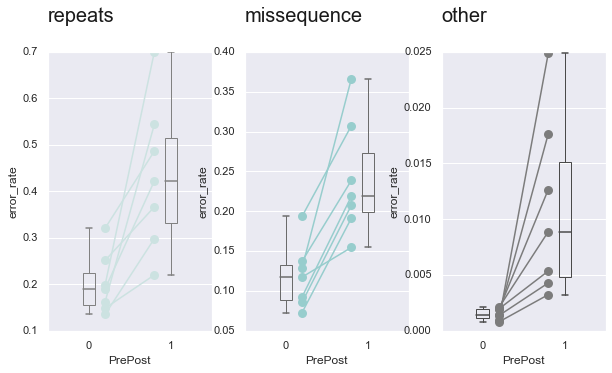

In [733]:
# plt.style.use('default') 

type_split_data = dict(tuple(repeat_errors_df.groupby('PrePost')))
PreRepeats = list(type_split_data[0]['error_rate'])
PostRepeats = list(type_split_data[1]['error_rate'])

type_split_data = dict(tuple(Misseq_errors_df.groupby('PrePost')))
PreMisseq = list(type_split_data[0]['error_rate'])
PostMisseq = list(type_split_data[1]['error_rate'])

type_split_data = dict(tuple(Other_errors_df.groupby('PrePost')))
PreOther = list(type_split_data[0]['error_rate'])
PostOther = list(type_split_data[1]['error_rate'])

titles = ['repeats', 'missequence','other']

ort = 'v'

fig,axs = plt.subplots(1, 3, figsize=(10, 5))
for ind, ax in enumerate(fig.axes):
            
    if ind == 0:
        for i in range(len(PostRepeats)):
            ax.plot([0.2,0.8],[PreRepeats[i],PostRepeats[i]],'o-',color ='#CCE2E1',markeredgecolor = 'none',alpha = 1, markersize = 9,markeredgewidth=0)
            
        ax=sns.boxplot( x = 'PrePost', y = 'error_rate', data = repeat_errors_df, color = '#CCE2E1', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10,'linewidth':1},\
            showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
               saturation = 1, orient = ort, ax = ax)
        
            
    if ind == 1:
        for i in range(len(PreMisseq)):
            ax.plot([0.2,0.8],[PreMisseq[i],PostMisseq[i]],'o-',color ='#97CDCD',markeredgecolor = 'none',alpha = 1, markersize = 9,markeredgewidth=0)

        ax=sns.boxplot( x = 'PrePost', y = 'error_rate', data = Misseq_errors_df, color = '#97CDCD', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10,'linewidth':1},\
            showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
               saturation = 1, orient = ort, ax = ax)
        
            
    if ind == 2:
        for i in range(len(PreOther)):
            ax.plot([0.2,0.8],[PreOther[i],PostOther[i]],'o-',color ='#7C7C7C',markeredgecolor = 'none',alpha = 1, markersize = 9,markeredgewidth=0)

        ax=sns.boxplot( x = 'PrePost', y = 'error_rate', data = Other_errors_df, color = '#7C7C7C', width = .15, zorder = 10,\
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10,'linewidth':1},\
                showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
                   saturation = 1, orient = ort, ax = ax)
        

    ax.set_xlim([-0.5, 1.5])
    
#     ax.axis('off')
    
    ax.set_title(titles[ind], loc = 'left',fontsize = 20,pad = 30, color = 'k')
    
    
#stats
print('only 7 data values per gorup - too few for normality test. data assumed normal')
# print('repeat stats:')
# if scipy.stats.normaltest(repeat_errors_df.error_rate.values)[-1] > 0.05:
#     print('data is normally distributed')
# else:
#     print('data is not normally distributed')
print(scipy.stats.ttest_rel(repeat_errors_df.error_rate[repeat_errors_df.PrePost == 0],repeat_errors_df.error_rate[repeat_errors_df.PrePost == 1]))

print('---------')
# print('misseq stats:')
# if scipy.stats.normaltest(Misseq_errors_df.error_rate.values)[-1] > 0.05:
#     print('data is normally distributed')
# else:
#     print('data is not normally distributed')
print(scipy.stats.ttest_rel(Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 0],Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 1]))

print('---------')
# print('other stats:')
# if scipy.stats.normaltest(Other_errors_df.error_rate.values)[-1] > 0.05:
#     print('data is normally distributed')
# else:
#     print('data is not normally distributed')
print(scipy.stats.ranksums(Other_errors_df.error_rate[Other_errors_df.PrePost == 0],Other_errors_df.error_rate[Other_errors_df.PrePost == 1]))

    
# SaveFig('error_rate_breakdown.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

In [974]:
stats.ttest_rel(Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 0],Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 1])



scipy.stats.ttest_ind(Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 0],Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 1])
scipy.stats.ttest_ind(Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 0],Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 1])
scipy.stats.ttest_ind(Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 0],Misseq_errors_df.error_rate[Misseq_errors_df.PrePost == 1])

NameError: name 'stats' is not defined

repeat pre-proportion = 0.6267087778116783   SEM = 0.024639369023963825
misseq pre-proportion = 0.3685716632252995   SEM = 0.015383856281761865
other pre-proportion = 0.004719558963022132   SEM = 0.00018884421037004302
-----------------
repeat post-proportion = 0.6330765754936911   SEM = 0.060633209289781
misseq post-proportion = 0.35088814845435023   SEM = 0.02743248747574698
other post-proportion = 0.016035276051958612   SEM = 0.003011837274520427


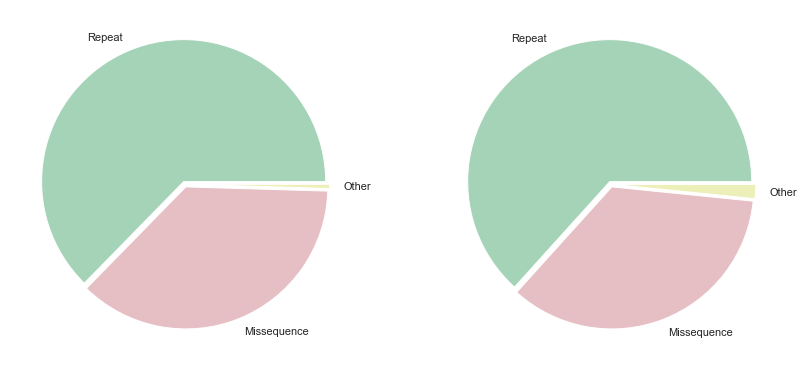

In [972]:
fig,[ax,ax1] = plt.subplots(1, 2, figsize=(14, 8))

explode = (0.02, 0.02, 0.02)
colors = ['#A5D3B7','#E6BFC4','#ECEFB7']

prerepeat_mean = np.mean(l_error_rates_breakdown.PreRepeat.values)
premisseq_mean = np.mean(l_error_rates_breakdown.PreMisseq.values)
preother_mean= np.mean(l_error_rates_breakdown.Preother.values)
total_prop = prerepeat_mean + premisseq_mean + preother_mean

y = np.array([prerepeat_mean/total_prop, premisseq_mean/total_prop,preother_mean/total_prop])
mylabels = ["Repeat", "Missequence", "Other" ]

ax.pie(y, labels = mylabels,explode =explode, colors=colors )

Postrepeat_mean = np.mean(l_error_rates_breakdown.PostRepeat.values)
Postmisseq_mean = np.mean(l_error_rates_breakdown.PostMissseq.values)
Postother_mean= np.mean(l_error_rates_breakdown.PostOther.values)
total_prop = Postrepeat_mean + Postmisseq_mean + Postother_mean

y2 = np.array([Postrepeat_mean/total_prop, Postmisseq_mean/total_prop,Postother_mean/total_prop])
mylabels = ["Repeat", "Missequence", "Other" ]

ax1.pie(y2, labels = mylabels,explode =explode,colors=colors )

prerepeat_sem = scipy.stats.sem(l_error_rates_breakdown.PreRepeat.values)
premisseq_sem = scipy.stats.sem(l_error_rates_breakdown.PreMisseq.values)
preother_sem= scipy.stats.sem(l_error_rates_breakdown.Preother.values)
Postrepeat_sem = scipy.stats.sem(l_error_rates_breakdown.PostRepeat.values)
Postmisseq_sem = scipy.stats.sem(l_error_rates_breakdown.PostMissseq.values)
Postother_sem= scipy.stats.sem(l_error_rates_breakdown.PostOther.values)

print('repeat pre-proportion = ' + str(y[0]) + '   SEM = ' + str(prerepeat_sem))
print('misseq pre-proportion = ' + str(y[1]) + '   SEM = ' + str(premisseq_sem))
print('other pre-proportion = ' + str(y[2]) + '   SEM = ' + str(preother_sem))
print('-----------------')
print('repeat post-proportion = ' + str(y2[0]) + '   SEM = ' + str(Postrepeat_sem))
print('misseq post-proportion = ' + str(y2[1]) + '   SEM = ' + str(Postmisseq_sem))
print('other post-proportion = ' + str(y2[2]) + '   SEM = ' + str(Postother_sem))
      
    
# SaveFig('error_rate_proportions.svg',r'Z:\projects\Emmett\Documents\writeup\fig1_striatum_lesions\figs\\')

In [ ]:
## transition speed 
## poke proportions


In [973]:

def extract_errorBreakdown_into_df(input_):

    seq_errors = []
    spa_errors = []
    rep_errors = []
    oth_errors = []

    for i in range (3):
        for e in range(4):
            if e == 0:
                seq_errors = seq_errors + [list(np.array(input_[i])[:,e])]
            if e == 1:
                spa_errors = spa_errors + [list(np.array(input_[i])[:,e])]
            if e == 2:
                rep_errors = rep_errors + [list(np.array(input_[i])[:,e])]
            if e == 3:
                oth_errors = oth_errors + [list(np.array(input_[i])[:,e])]

    errors = pd.DataFrame({ 'Group':['Early','Pre', 'Post'], 'seq_errors':  seq_errors, 
        'spa_errors': spa_errors, 'rep_errors': rep_errors, 'oth_errors': oth_errors })
    return errors 


c_errorsbd = extract_errorBreakdown_into_df(control_df['AA_errorbreakdown'])
l_errorsbd = extract_errorBreakdown_into_df(lesion_df['AA_errorbreakdown'])


buzz_words = 'seq_errors', 'spa_errors', 'rep_errors', 'oth_errors'

nrow = 1 
ncol = 4
counter = 0
fig, axs = plt.subplots(nrow, ncol,figsize=(40, 20))
for i, ax in enumerate(fig.axes):

    buzz =buzz_words[i]

    ax.set_title(buzz,loc = 'left',fontsize = 20,pad = 5)

    
#     for i in range(len(Controls)):
#         plt.plot([0,1],[c_errorsbd[buzz][1][i],c_errorsbd[buzz][2][i]],'o-')
#     for i in range(len(Lesions)):
#         plt.plot([2,3],[l_errorsbd[buzz][1][i],l_errorsbd[buzz][2][i]],'o-')

    for i in range(len(Controls)):
        ax.plot([0,1],[c_errorsbd[buzz][1][i],c_errorsbd[buzz][2][i]],'o-',color = colors[1],alpha = 0.5, markersize = 15)
    for i in range(len(Lesions)):
        ax.plot([2,3],[l_errorsbd[buzz][1][i],l_errorsbd[buzz][2][i]],'o-',color = colors[0],alpha = 0.5, markersize = 15)

    ax.bar(0,np.mean(np.mean(c_errorsbd[buzz][1])),color = colors[1], alpha = 0.4)
    ax.bar(1,np.mean(np.mean(c_errorsbd[buzz][2])),color = colors[1], alpha = 0.4)

    ax.bar(2,np.mean(np.mean(l_errorsbd[buzz][1])),color = colors[0], alpha = 0.4)
    ax.bar(3,np.mean(np.mean(l_errorsbd[buzz][2])),color = colors[0], alpha = 0.4)

    ax.set_ylim([0, 1])

    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(('Baseline', 'Saline', 'Baseline', 'Lesion'), fontsize = 15)

    ax.set_ylabel('Error proportions',fontsize = 30)

    ax.tick_params(axis='both', which='major', labelsize=30)

NameError: name 'control_df' is not defined

In [477]:
l_error_rates_breakdown

,Animal,PreRepeat,PreMisseq,Preother,PostRepeat,PostMissseq,PostOther,pre_transition_types,pre_transition_times,post_transition_types,post_transition_times
0,EJT154,0.190694,0.137300,0.001373,0.422143,0.238571,0.004286,"[[16, 67, 73, 21, 44, 22, 26, 67, 77, 77, 77, ...","[[0.987099999999998, 1.6277000000000008, 0.412...","[[28, 87, 77, 77, 77, 77, 37, 77, 77, 73, 37, ...","[[1.0262000000000029, 0.6505999999999972, 0.01..."
0,EJT155,0.148672,0.085711,0.001968,0.220109,0.207322,0.005355,"[[11, 11, 12, 22, 23, 33, 37, 76, 66, 65, 12, ...","[[0.1126000000000004, 0.4693999999999931, 0.95...","[[12, 22, 23, 37, 73, 32, 21, 13, 33, 33, 37, ...","[[0.7670000000000003, 0.0001999999999995, 0.41..."
0,EJT156,0.199075,0.117385,0.002095,0.699822,0.154529,0.008881,"[[12, 26, 66, 66, 67, 63, 37, 77, 75, 56, 67, ...","[[1.2249999999999943, 0.5729999999999933, 1.79...","[[33, 77, 77, 73, 47, 77, 77, 77, 33, 37, 44, ...","[[0.4294999999999902, 0.1621000000000094, 0.83..."
0,EJT157,0.135377,0.128991,0.001916,0.298228,0.366076,0.012658,"[[88, 41, 23, 37, 76, 66, 67, 78, 84, 44, 44, ...","[[0.0067000000000092, 1.332800000000006, 0.478...","[[87, 27, 76, 61, 11, 21, 11, 16, 62, 22, 23, ...","[[0.4681000000000015, 0.8424999999999976, 0.98..."
0,EJT159,0.251421,0.193647,0.000801,0.366488,0.307100,0.003237,"[[23, 37, 78, 83, 37, 71, 13, 37, 76, 67, 73, ...","[[0.6437000000000097, 0.452699999999993, 1.323...","[[77, 37, 88, 63, 37, 33, 37, 72, 21, 16, 67, ...","[[0.0625, 0.5226000000000113, 0.14809999999999..."
0,EJT161,0.162704,0.092476,0.001002,0.544041,0.218653,0.024870,"[[66, 66, 66, 32, 21, 16, 66, 63, 37, 21, 13, ...","[[0.0840999999999994, 0.1423000000000058, 0.47...","[[44, 44, 44, 44, 44, 44, 44, 44, 47, 42, 26, ...","[[0.0080999999999988, 0.0001999999999995, 0.04..."
0,EJT85,0.320729,0.072939,0.001454,0.486496,0.191214,0.017645,"[[78, 23, 33, 77, 15, 56, 62, 22, 22, 22, 23, ...","[[0.6308000000000007, 1.3369, 0.11749999999999...","[[66, 66, 55, 77, 77, 87, 77, 77, 73, 36, 62, ...","[[0.5858000000000629, 0.0372999999999592, 0.05..."


In [247]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    return abs((d2 - d1).days)

In [253]:
def load_transitions_for_file_catagory(files,InputPathCurrent,Tlevel_filter):

    # transition times
    TransitionTypes = []
    TransitionTimes = []
    Transitions = []
    # transitions
    TimeFiltered_seqs = []
    Sessions_processed = []

    for index, file in enumerate(files):

        CurrentInputPath = (InputPathCurrent +file+'\\')

        with open (CurrentInputPath+'Preprocessed_TrainingLevels' , 'rb') as fp:
            TrainingLevels = list(pickle.load(fp))

        # if every trial was at level 50:
        if Tlevel_filter == False:
            process_data = True
        elif all_50(TrainingLevels):
            process_data = True
        else:
            process_data = False
            
        if process_data == True:
            
            Sessions_processed = Sessions_processed + [int(file[0:2])]

            print(file)
            Session_data =  pd.read_csv((CurrentInputPath+'PreProcessed_SessionInfo.csv'))
            poke_data =  pd.read_csv((CurrentInputPath+'PreProcessed_RawPokeData.csv'))
            transition_data =  pd.read_csv((CurrentInputPath+'PreProcessed_TransitionData.csv'))
            timefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_timefilteredonly_df.csv'))
            P1alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port1aligned.csv'))
            P2alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port2aligned.csv'))
            P3alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port3aligned.csv'))
            P4alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port4aligned.csv'))
            P5alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port5aligned.csv'))


            #pull data out:

            ## transition times
            TransitionTypes_Tfilt,TransitionLatency_Tfilt = transition_time_data(transition_data)
            TransitionTypes = TransitionTypes + [TransitionTypes_Tfilt]
            TransitionTimes = TransitionTimes + [TransitionLatency_Tfilt]
            if index == 0:
                Transitions = Define_Transitions(Session_data)

            # transitions
            TimeFiltered_seqs = TimeFiltered_seqs + [list(timefiltseqs_data.loc[:,'Sequence_ids'])]

    return(TransitionTypes,TransitionTimes,Transitions,TimeFiltered_seqs,Sessions_processed)

In [263]:
def transition_time_data(transition_data):   
    #pull data from dfs:
    Time_filter = np.array(transition_data.loc[:,'2s_Time_Filter_in_in'])
    TransitionTypes_unfilt = np.array(transition_data.loc[:,'Transition_type'])
    TransitionLatency_unfilt = np.array(transition_data.loc[:,'in_in_Latency'])
    # filter out transitions that are too slow (defined in preprocessing as 2s)
    TransitionTypes_Tfilt = list(TransitionTypes_unfilt[Time_filter==1])
    TransitionLatency_Tfilt = list(TransitionLatency_unfilt[Time_filter==1])
    return (TransitionTypes_Tfilt,TransitionLatency_Tfilt) 

def Define_Transitions(Session_data):
    # determine ports for each transition 
    Transitions = []
    Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition1']))
    Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition2']))
    Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition3']))
    Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition4']))
    return(Transitions)

def determine_seq_scores_and_indicies(current_seq,variable_list):
    score = 0
    inds = []
    for item in variable_list:
        score= score + current_seq.count(item)
        current_inds = list(np.where(np.array(current_seq) == item)[0])
        inds = inds + current_inds
    return(score,inds)

In [ ]:
## error proportions pre and post 
## error breakdown 
## port poke proporitons
##transition speed?
